In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('../Lead Scoring.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [12]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
print(df['What matters most to you in choosing a course'].isna().mean() * 100)

29.318181818181817


In [14]:

print(" Shape of dataset:", df.shape)
print("\n Duplicate rows:", df.duplicated().sum())


 Shape of dataset: (9240, 37)

 Duplicate rows: 0


In [15]:
def missing_value_report(df):
    nulls = df.isnull().sum().to_frame(name='Missing Count')
    nulls['Missing %'] = (nulls['Missing Count'] / len(df)) * 100
    nulls = nulls[nulls['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)
    print("Columns with missing values:\n")
    print(nulls)


In [16]:
def univariate_numerical(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    for col in numerical_cols:
        print(f"\n📊 '{col}' Summary:")
        print(df[col].describe().round(2))


In [17]:
#univariate categorical

def univariate_categorical(df):
    categorical_cols = df.select_dtypes(include='object').columns.tolist()
    for col in categorical_cols:
        print(f"\n'{col}' Value Counts (Top 10):")
        print(df[col].value_counts(dropna=False).head(10))



In [18]:
def categorical_vs_target_rate(df, categorical_cols, target='Converted'):
    for col in categorical_cols:
        if df[col].nunique() <= 20:
            print(f"\nConversion Rate by '{col}':")
            print(df.groupby(col)[target].mean().sort_values(ascending=False).round(2))


In [19]:
def numerical_vs_target_stats(df, numerical_cols, target='Converted'):
    for col in numerical_cols:
        print(f"\n Statistics of '{col}' grouped by {target}:")
        print(df.groupby(target)[col].describe().round(2))


In [20]:
def correlation_matrix(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    print("\n🔗 Correlation Matrix:")
    print(df[num_cols].corr().round(2))


In [21]:
# Identify column types
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['Prospect ID', 'Lead Number']]

# Run all EDA parts
missing_value_report(df)
univariate_numerical(df)
univariate_categorical(df)
categorical_vs_target_rate(df, categorical_cols)
numerical_vs_target_stats(df, numerical_cols)
correlation_matrix(df)


Columns with missing values:

                                               Missing Count  Missing %
Lead Quality                                            4767  51.590909
Asymmetrique Profile Score                              4218  45.649351
Asymmetrique Activity Index                             4218  45.649351
Asymmetrique Activity Score                             4218  45.649351
Asymmetrique Profile Index                              4218  45.649351
Tags                                                    3353  36.287879
What matters most to you in choosing a course           2709  29.318182
Lead Profile                                            2709  29.318182
What is your current occupation                         2690  29.112554
Country                                                 2461  26.634199
How did you hear about X Education                      2207  23.885281
Specialization                                          1438  15.562771
City                              

In [22]:
def plot_numerical_vs_target(df, numerical_cols, target='Converted'):
    for col in numerical_cols:
        plt.figure(figsize=(14, 6))
        sns.boxplot(x=target, y=col, data=df, palette='Set2')
        plt.title(f'{col} by {target}')
        plt.tight_layout()
        plt.show()

In [23]:
corr = df[numerical_cols].corr()
corr

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
Lead Number,1.000000,0.025157,0.022223,0.020329,0.058808,-0.067982,-0.129124
Converted,0.025157,1.000000,0.030395,0.362483,-0.003328,0.167962,0.218571
TotalVisits,0.022223,0.030395,1.000000,0.221240,0.512125,-0.058514,0.130887
Total Time Spent on Website,0.020329,0.362483,0.221240,1.000000,0.320361,-0.065287,0.175589
Page Views Per Visit,0.058808,-0.003328,0.512125,0.320361,1.000000,-0.162892,0.161254
Asymmetrique Activity Score,-0.067982,0.167962,-0.058514,-0.065287,-0.162892,1.000000,-0.123250
Asymmetrique Profile Score,-0.129124,0.218571,0.130887,0.175589,0.161254,-0.123250,1.000000


In [24]:
def plot_correlation_matrix(df, numerical_cols):
    corr = df[numerical_cols].corr()
    print(corr)
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()


C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\3097537228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='Set2')


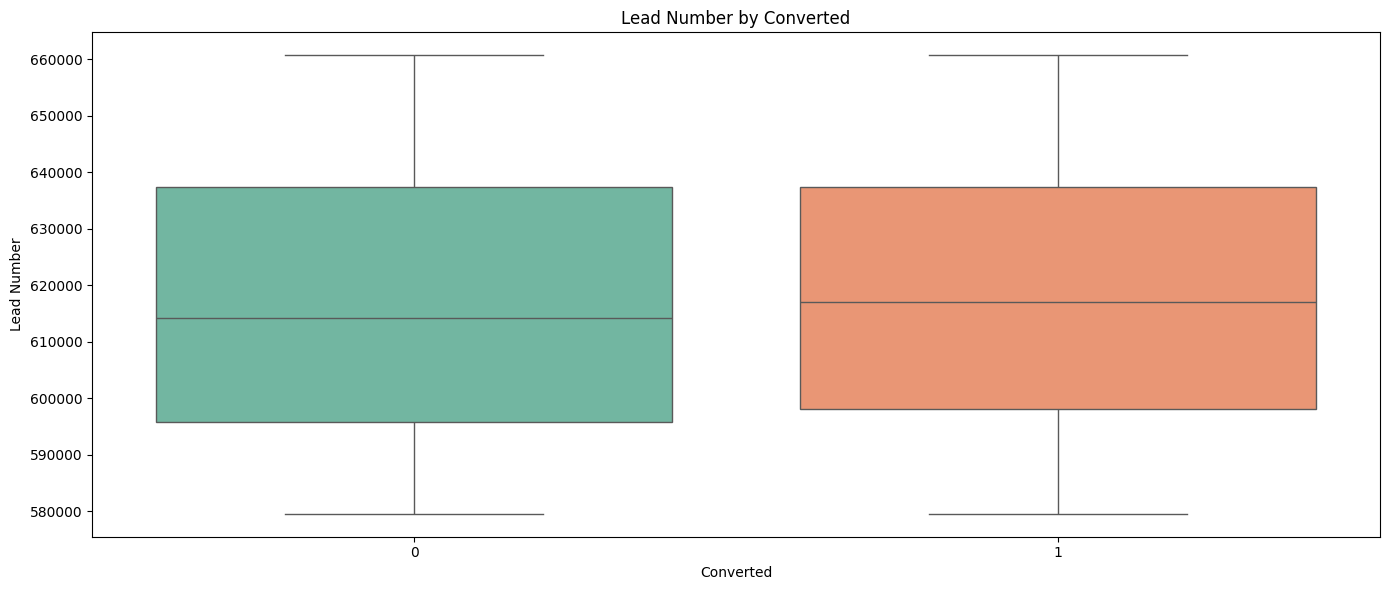

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\3097537228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='Set2')


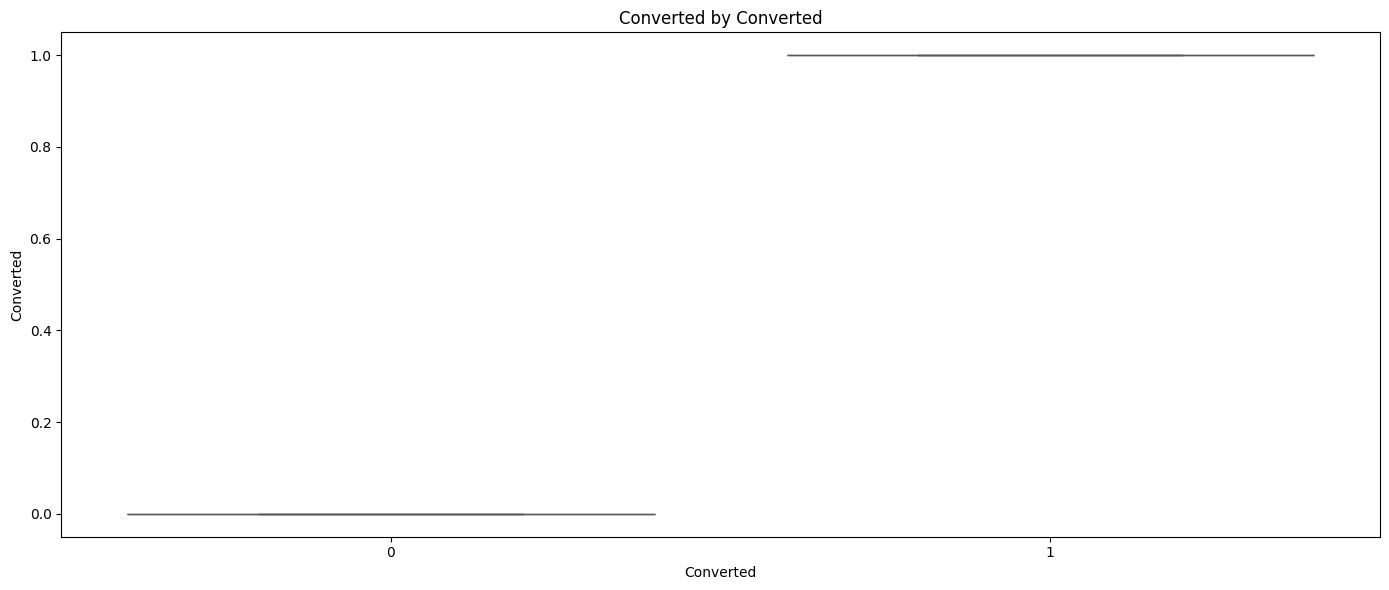

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\3097537228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='Set2')


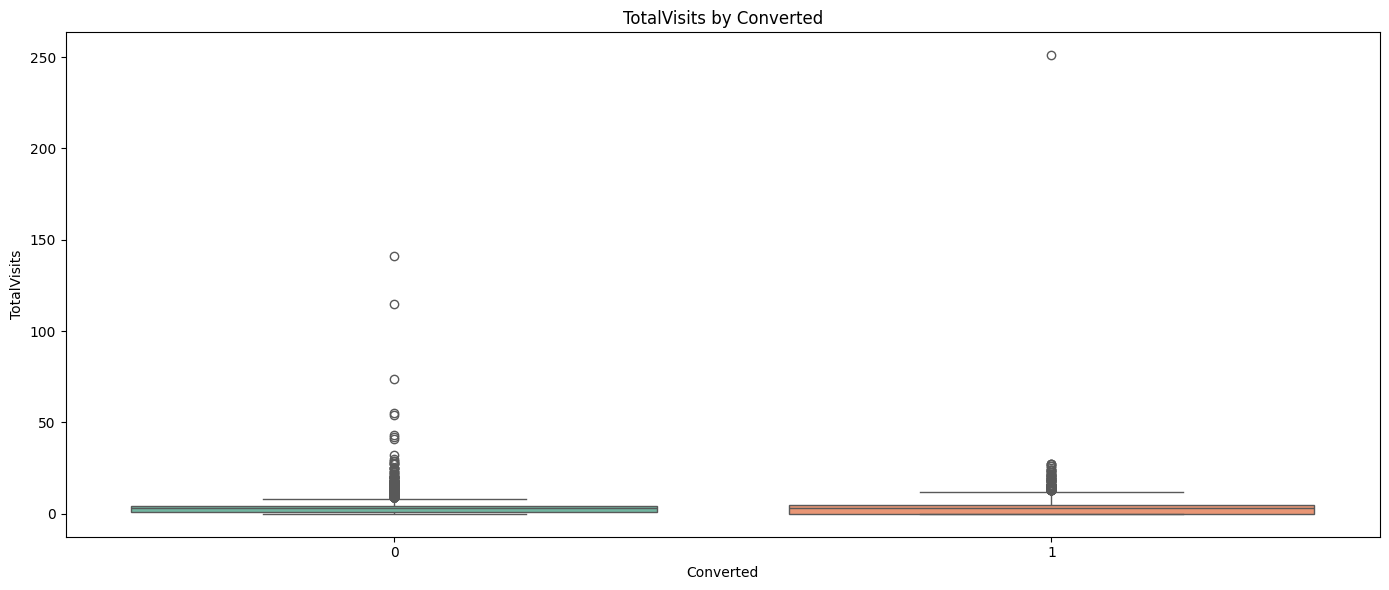

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\3097537228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='Set2')


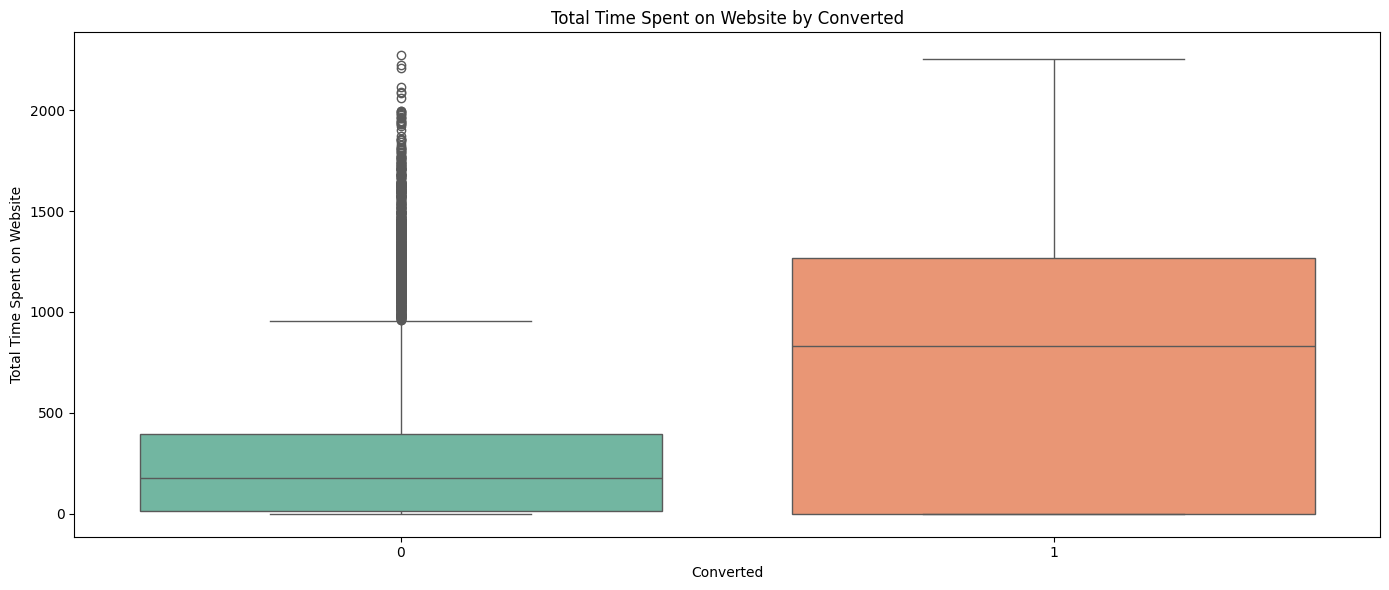

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\3097537228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='Set2')


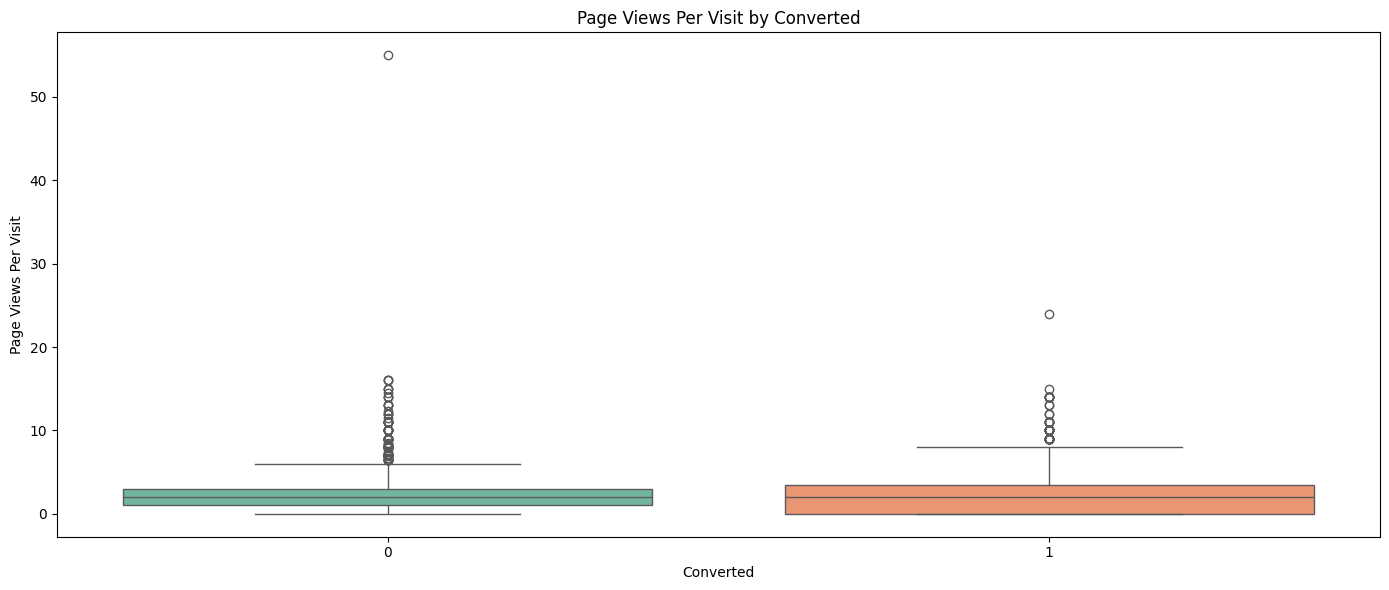

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\3097537228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='Set2')


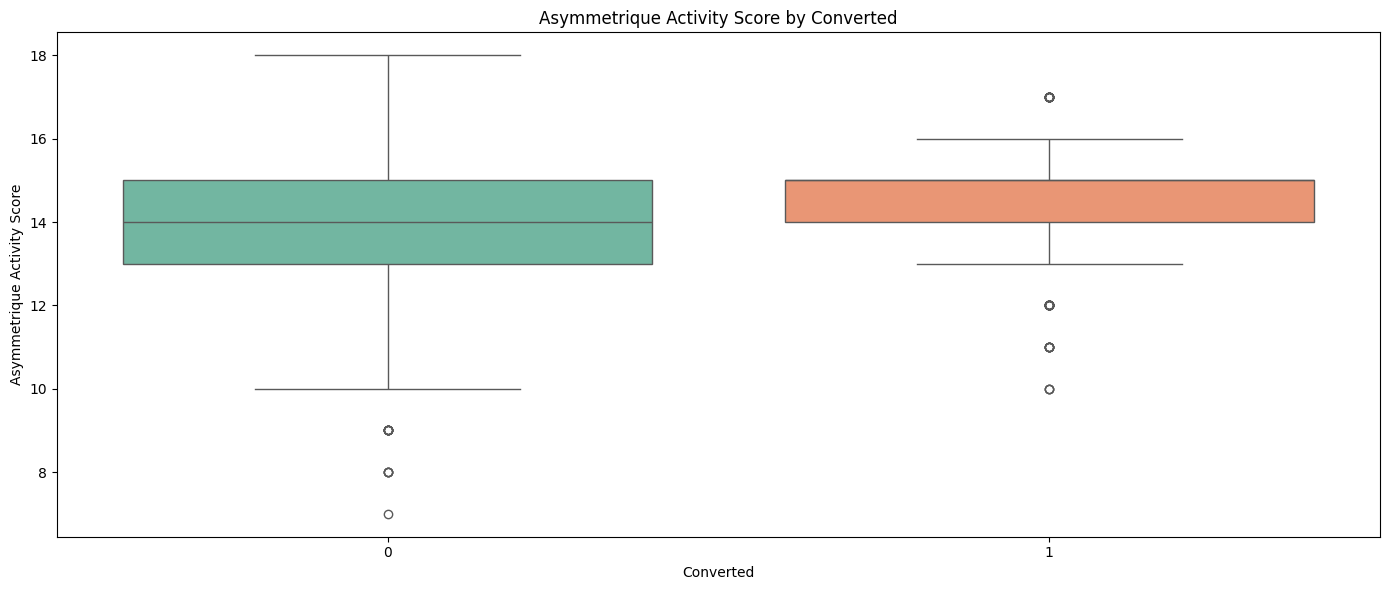

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\3097537228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='Set2')


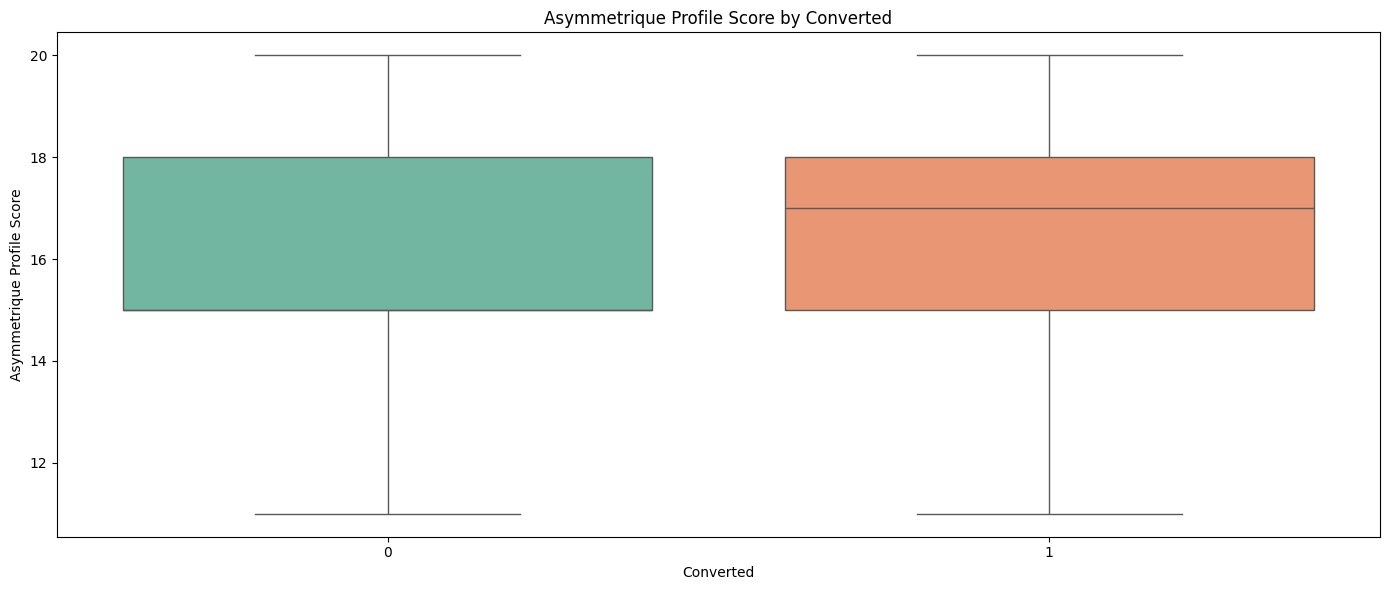

                             Lead Number  Converted  TotalVisits  \
Lead Number                     1.000000   0.025157     0.022223   
Converted                       0.025157   1.000000     0.030395   
TotalVisits                     0.022223   0.030395     1.000000   
Total Time Spent on Website     0.020329   0.362483     0.221240   
Page Views Per Visit            0.058808  -0.003328     0.512125   
Asymmetrique Activity Score    -0.067982   0.167962    -0.058514   
Asymmetrique Profile Score     -0.129124   0.218571     0.130887   

                             Total Time Spent on Website  \
Lead Number                                     0.020329   
Converted                                       0.362483   
TotalVisits                                     0.221240   
Total Time Spent on Website                     1.000000   
Page Views Per Visit                            0.320361   
Asymmetrique Activity Score                    -0.065287   
Asymmetrique Profile Score         

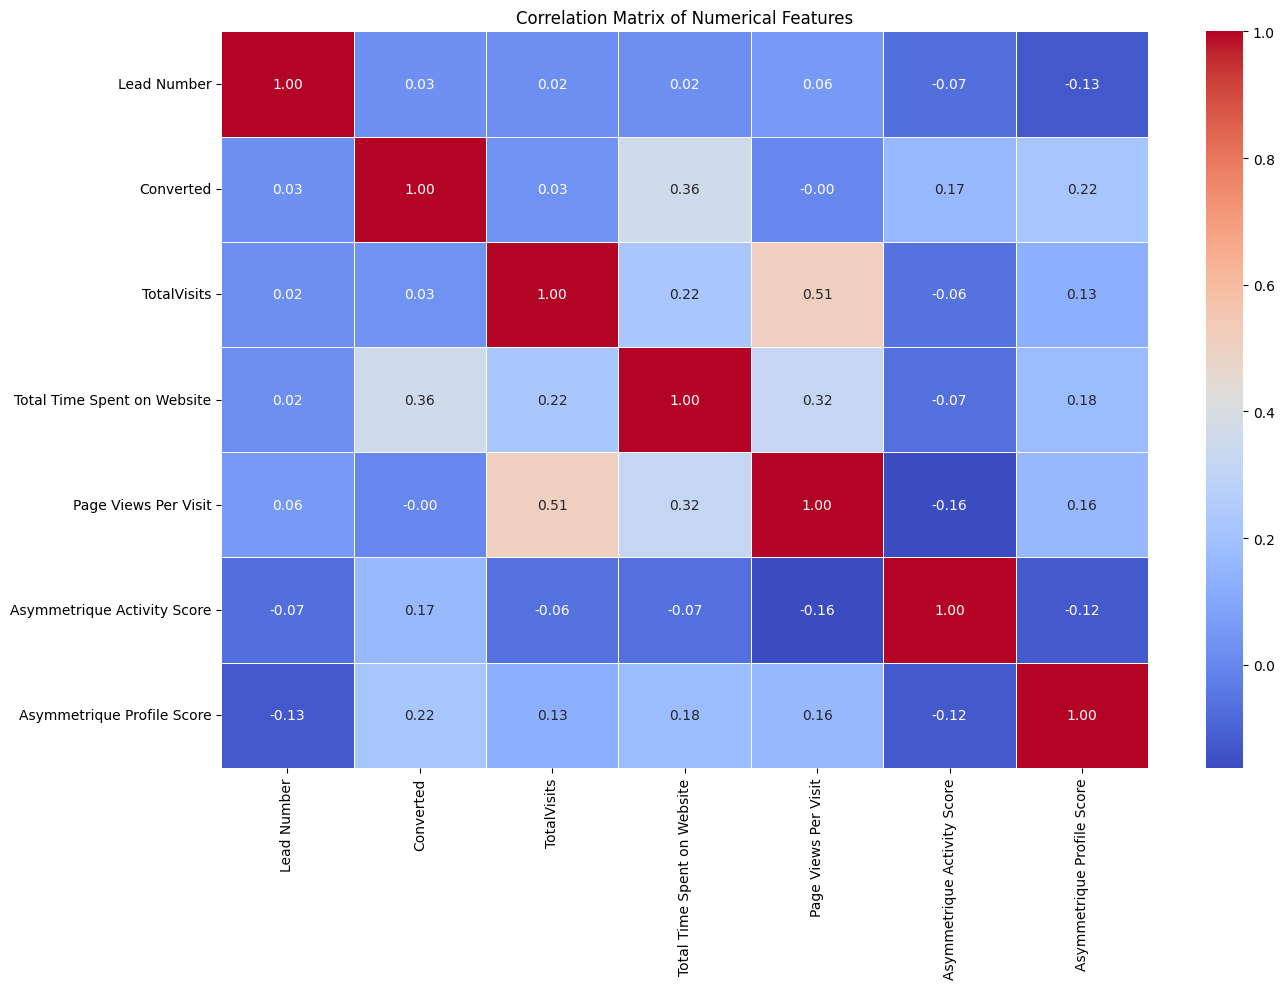

In [25]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plot_numerical_vs_target(df, numerical_cols)
plot_correlation_matrix(df, numerical_cols)

In [26]:
def plot_numerical_distribution(df, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(12, 6))
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='steelblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()


In [27]:
def plot_categorical_distribution(df, categorical_cols):
    for col in categorical_cols:
        plt.figure(figsize=(14, 6))
        order = df[col].value_counts().iloc[:10].index
        sns.countplot(data=df, x=col, order=order, palette='viridis')
        plt.title(f'Top Categories in {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [28]:
def plot_conversion_rate(df, categorical_cols, target='Converted'):
    for col in categorical_cols:
        if df[col].nunique() <= 20:
            plt.figure(figsize=(14, 6))
            conv_rate = df.groupby(col)[target].mean().sort_values(ascending=False)
            sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')
            plt.title(f'Conversion Rate by {col}')
            plt.ylabel('Conversion Rate')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


In [29]:
def plot_numerical_vs_target(df, numerical_cols, target='Converted'):
    for col in numerical_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=target, y=col, data=df, palette='Set2')
        plt.title(f'{col} by {target}')
        plt.tight_layout()
        plt.show()


In [30]:
def plot_correlation_matrix(df, numerical_cols):
    corr = df[numerical_cols].corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()


In [31]:
def plot_missing_heatmap(df):
    plt.figure(figsize=(14, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.show()


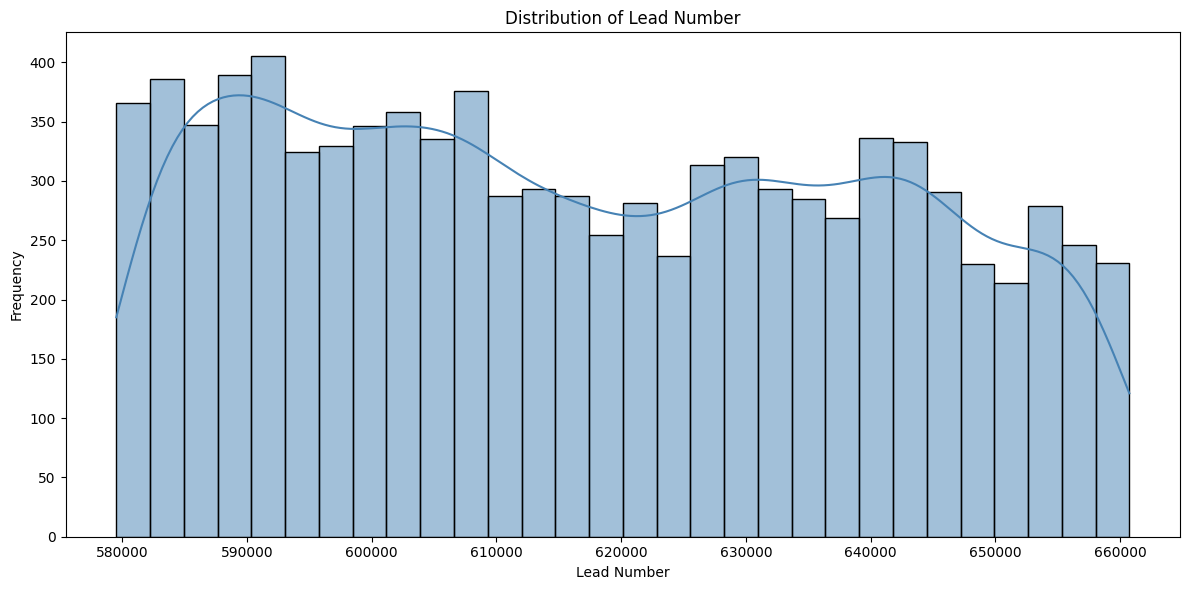

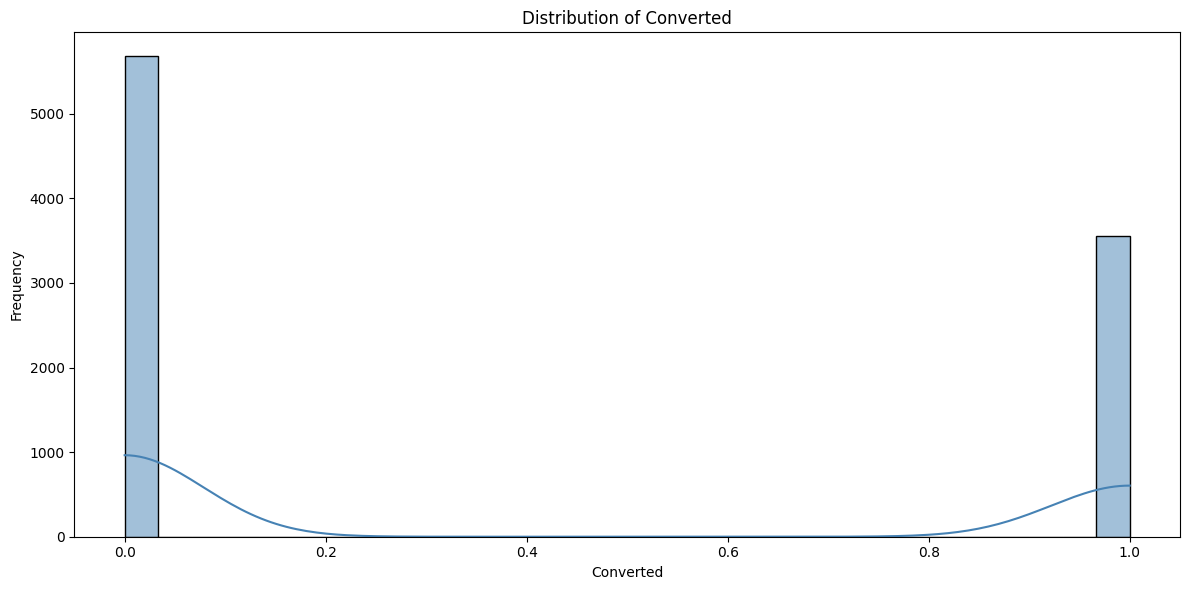

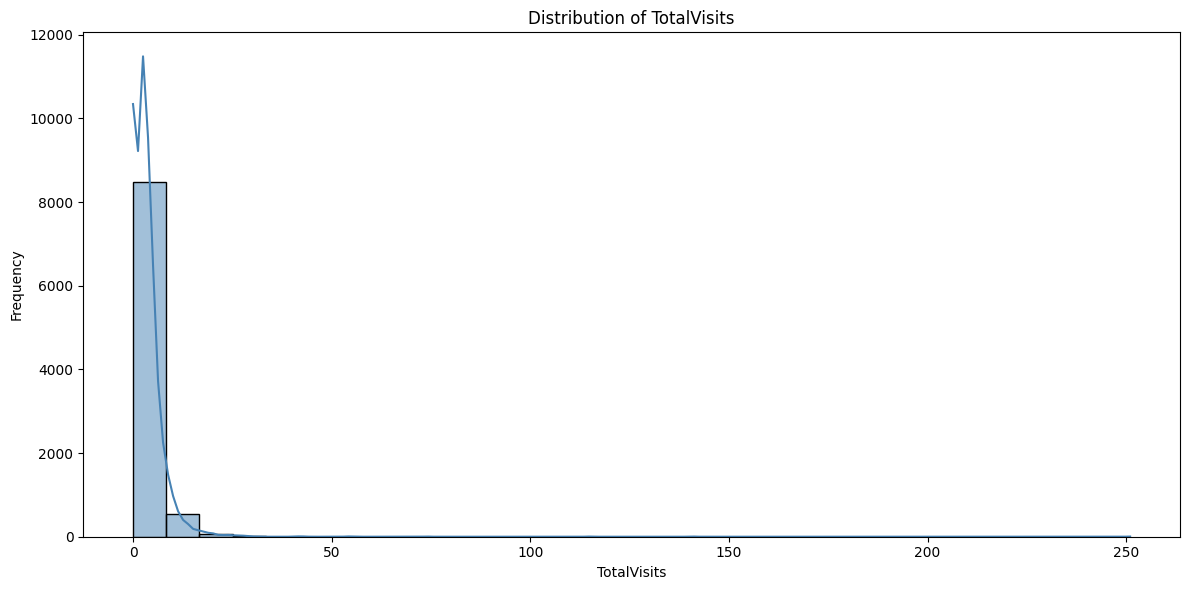

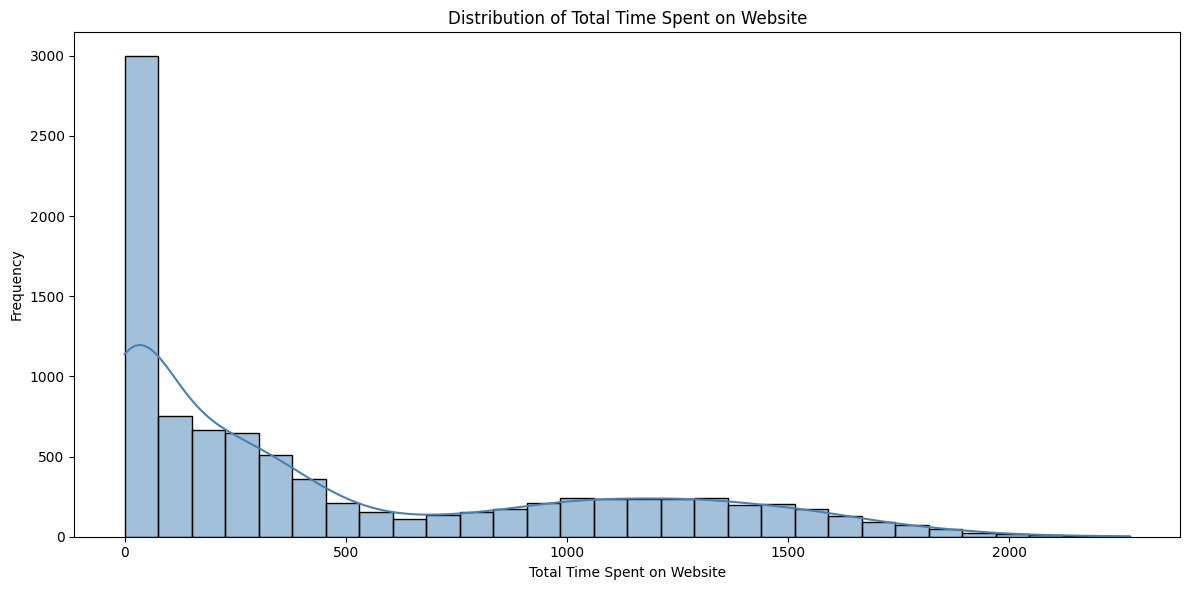

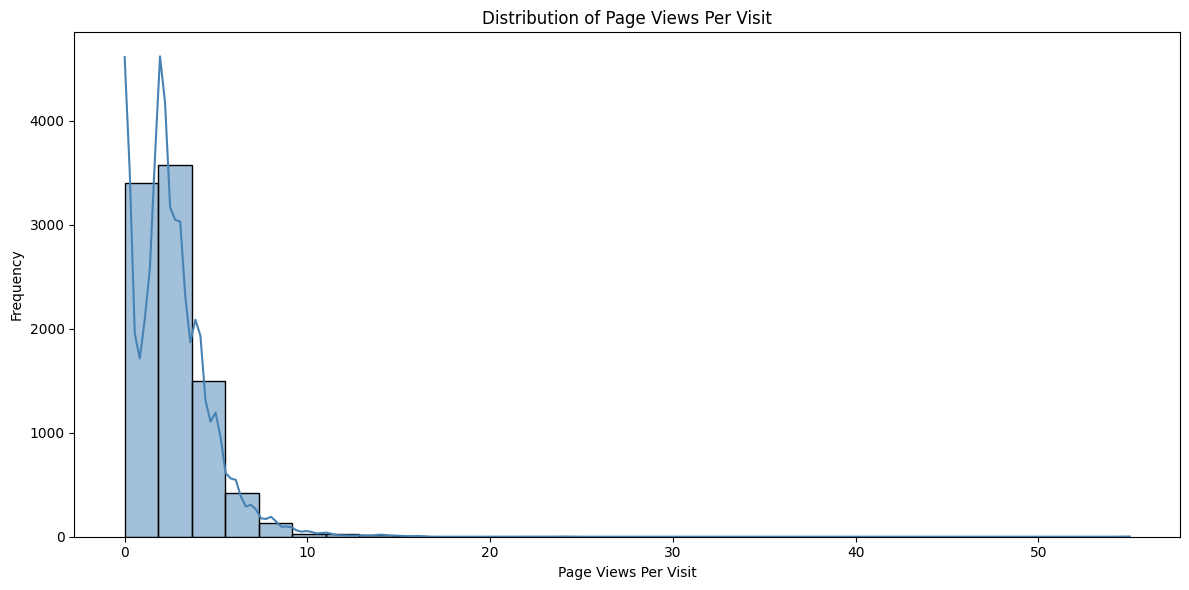

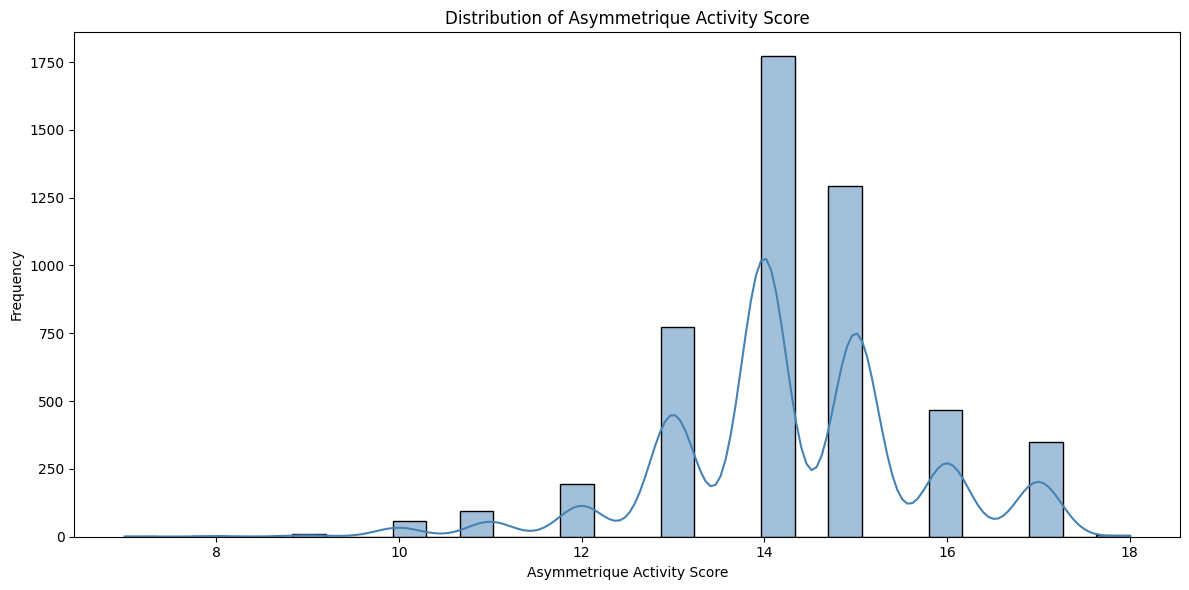

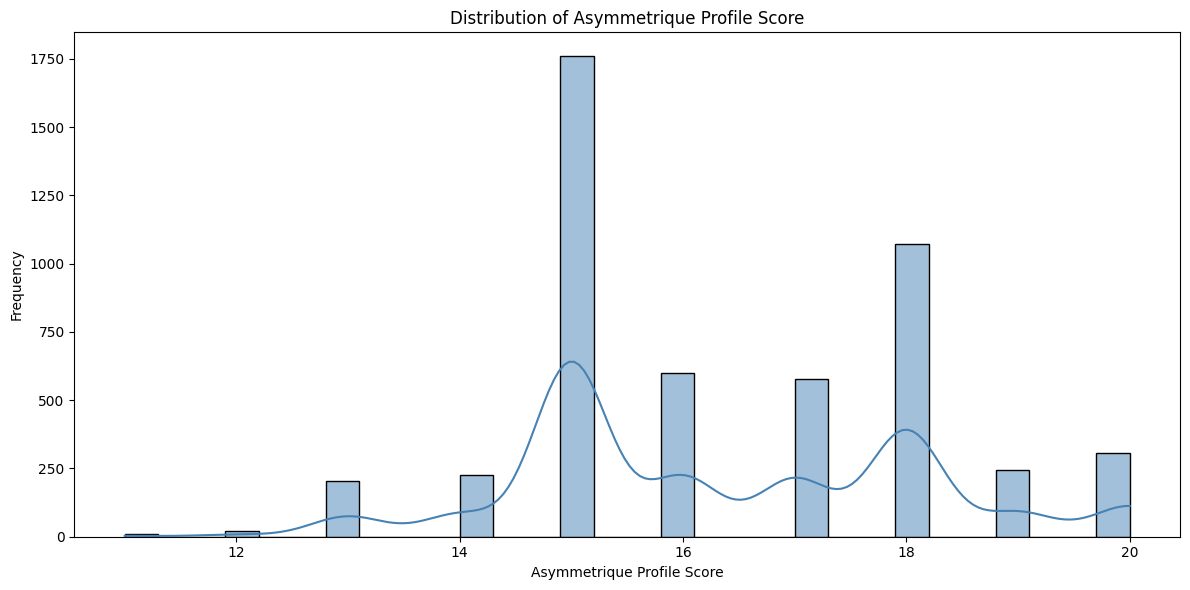

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


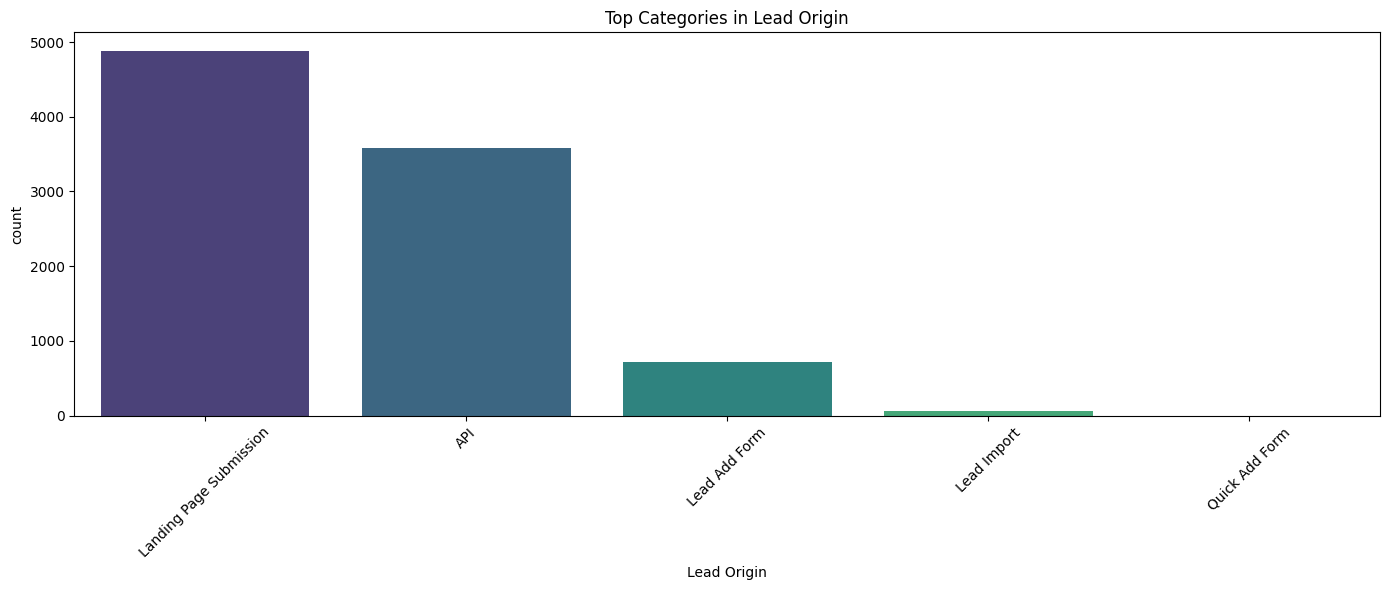

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


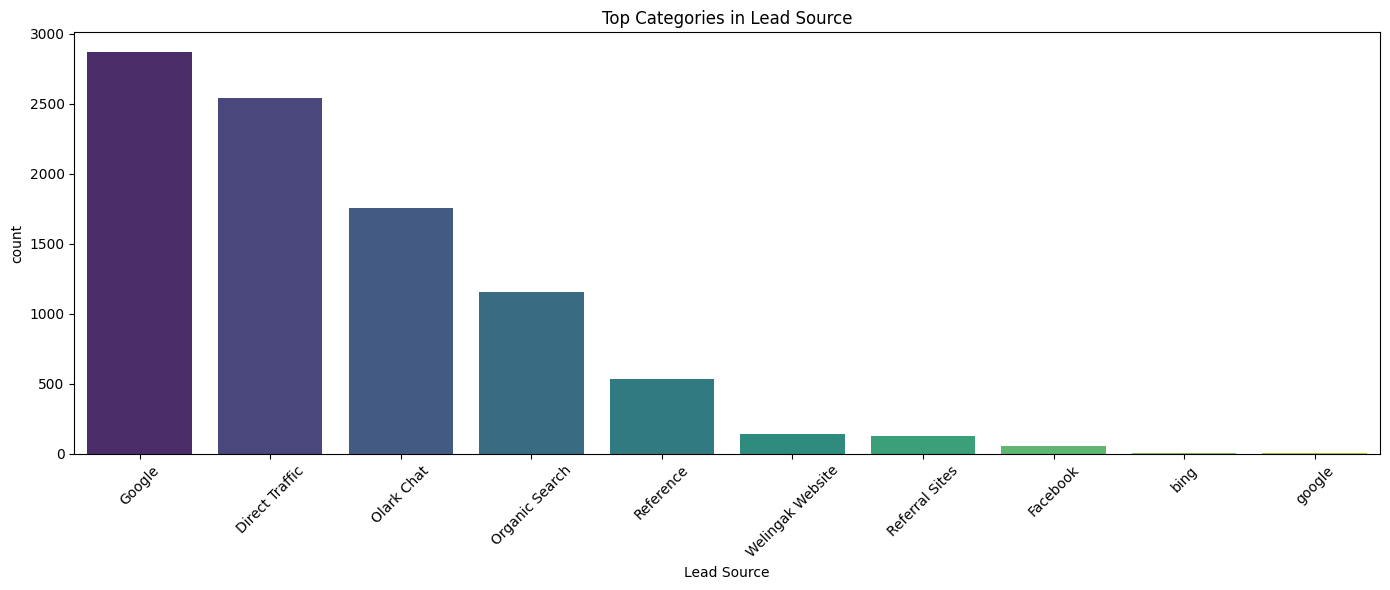

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


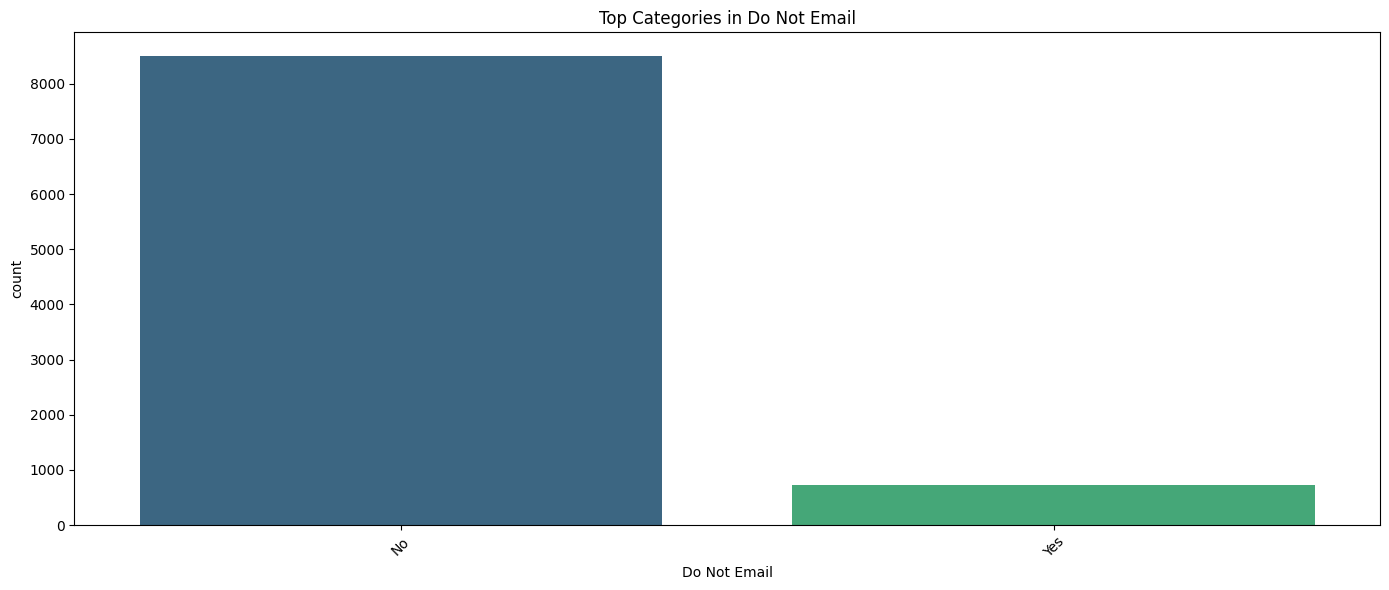

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


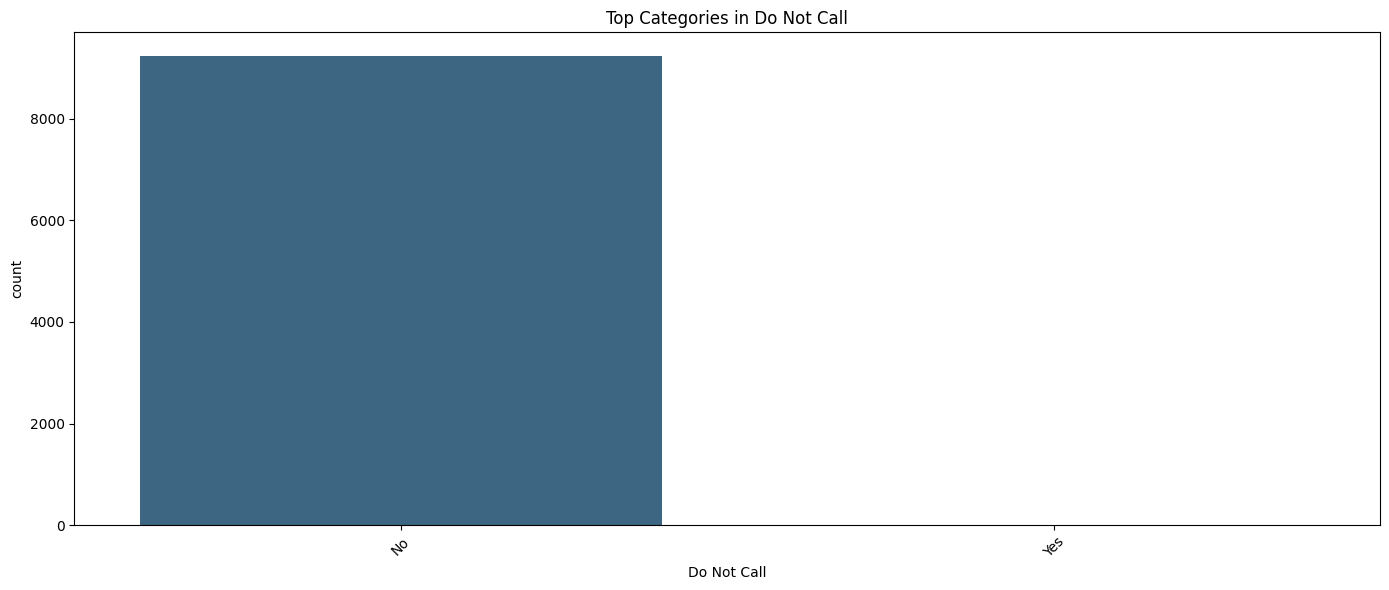

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


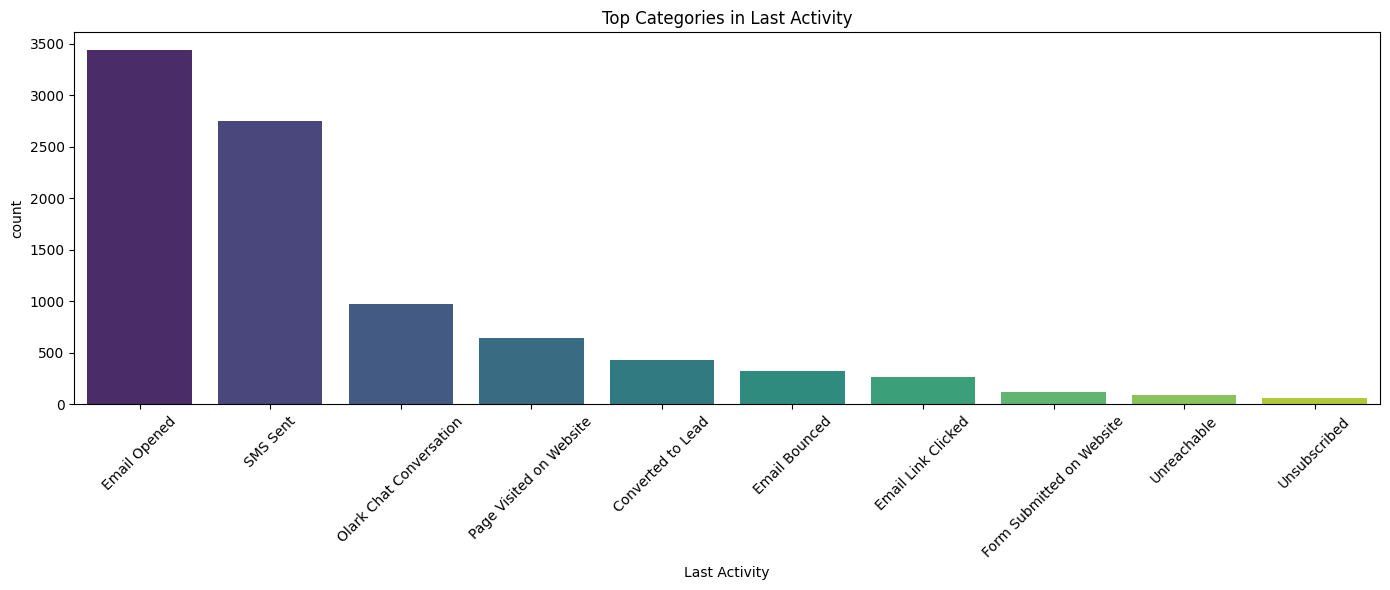

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


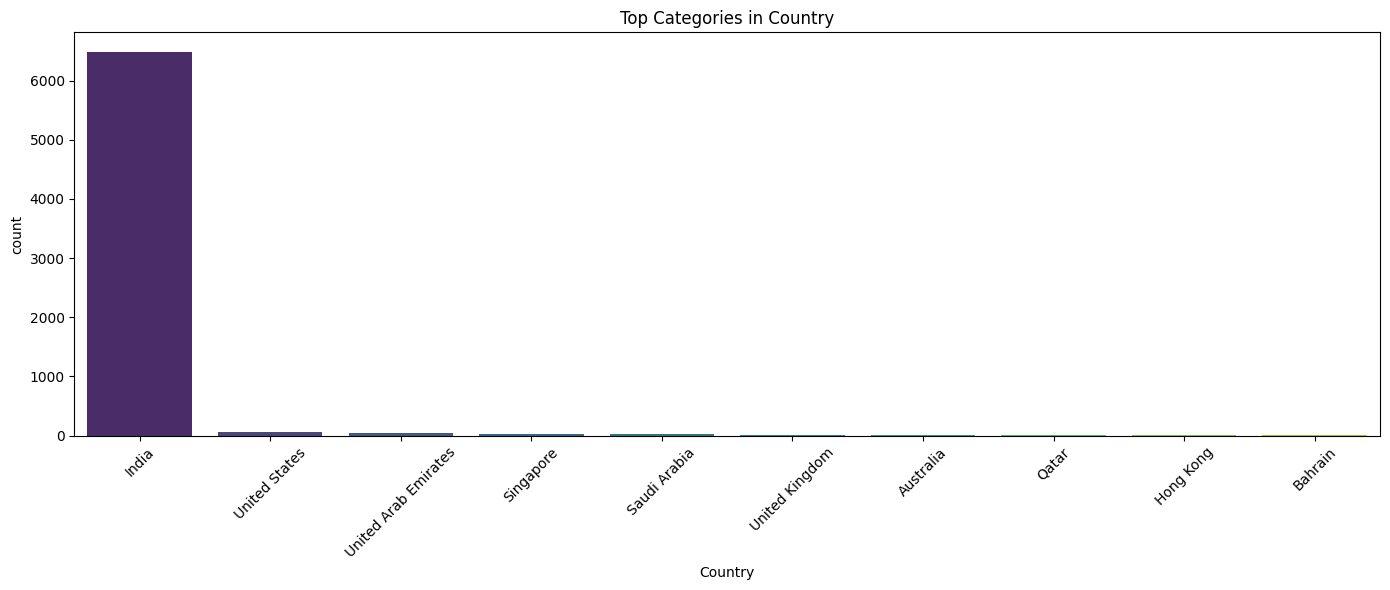

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


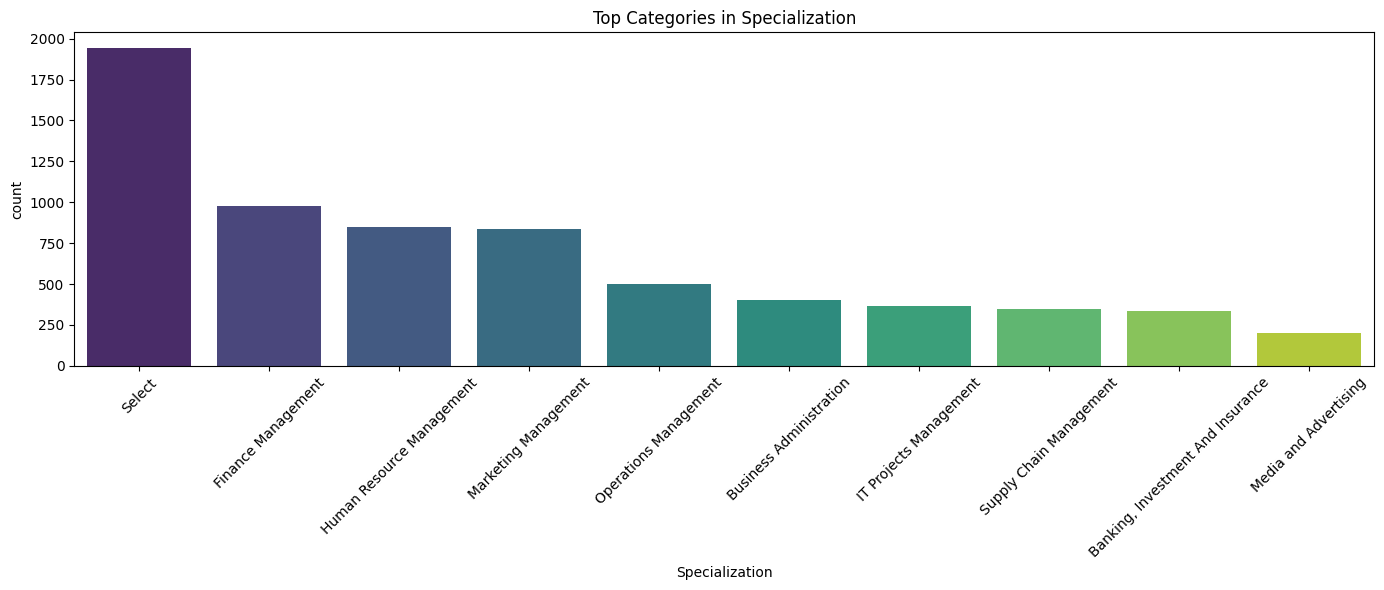

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


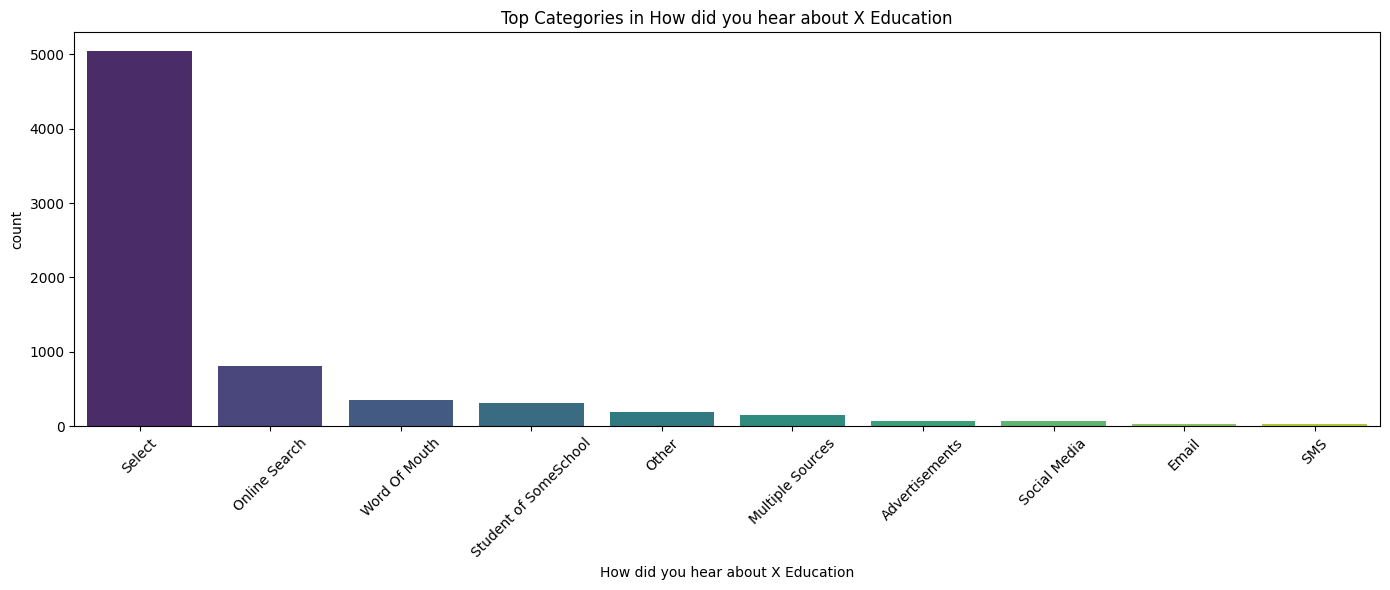

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


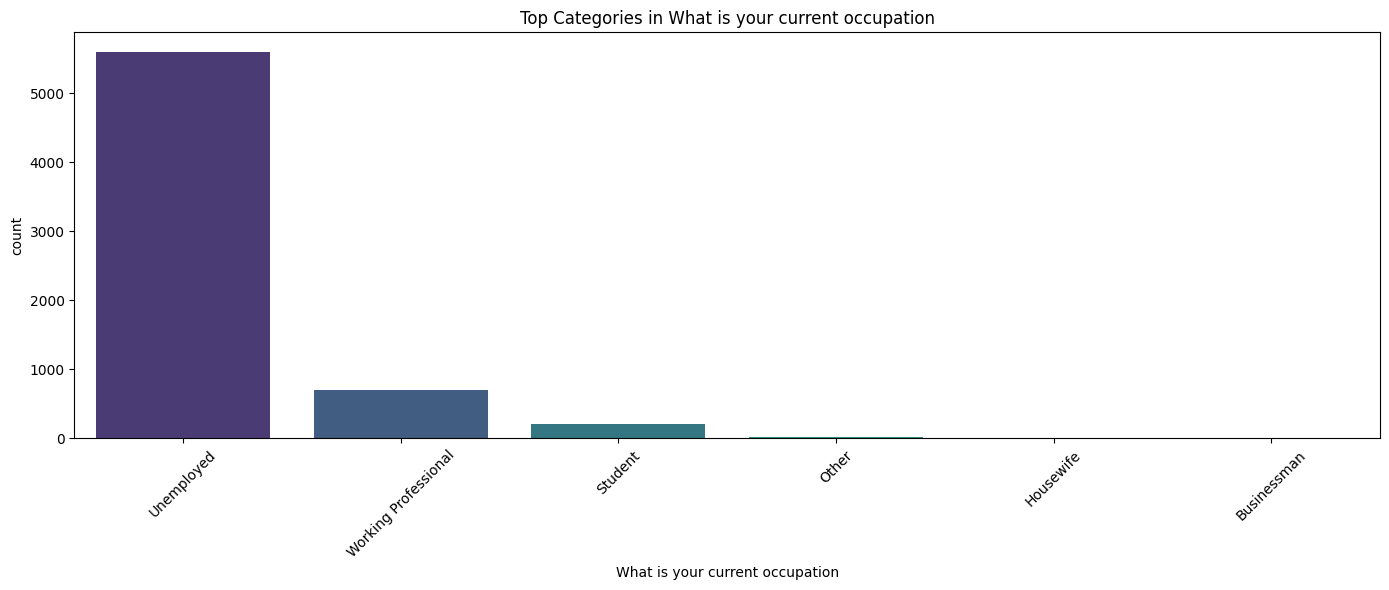

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


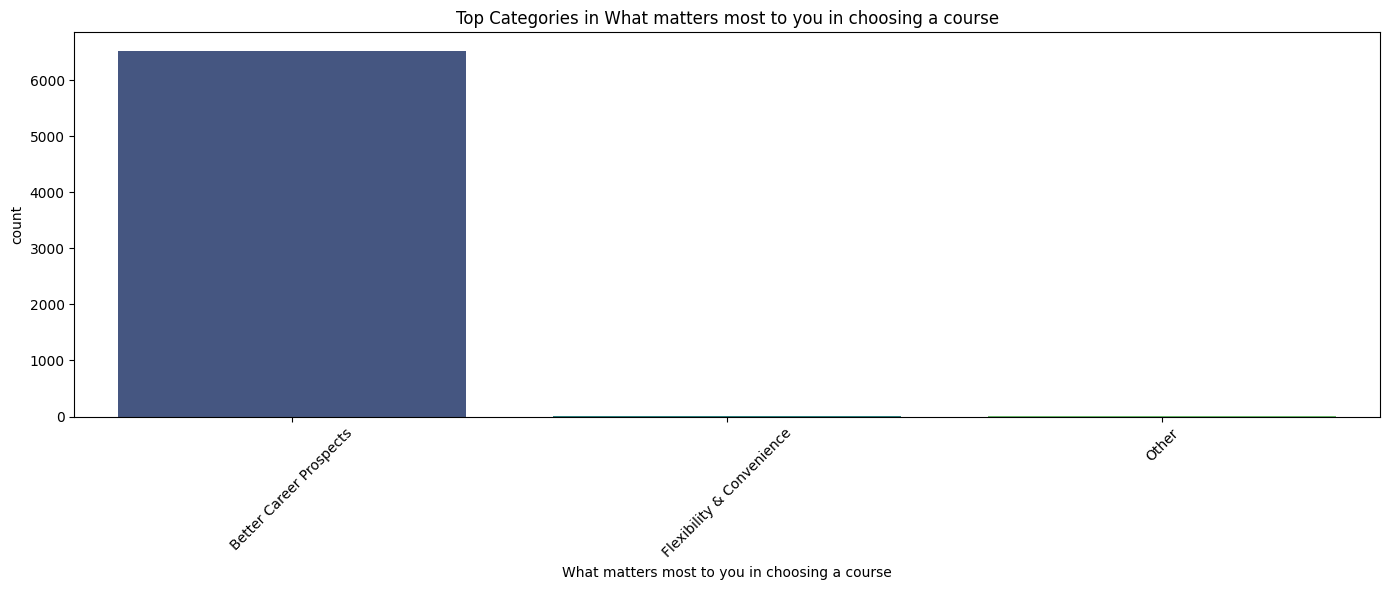

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


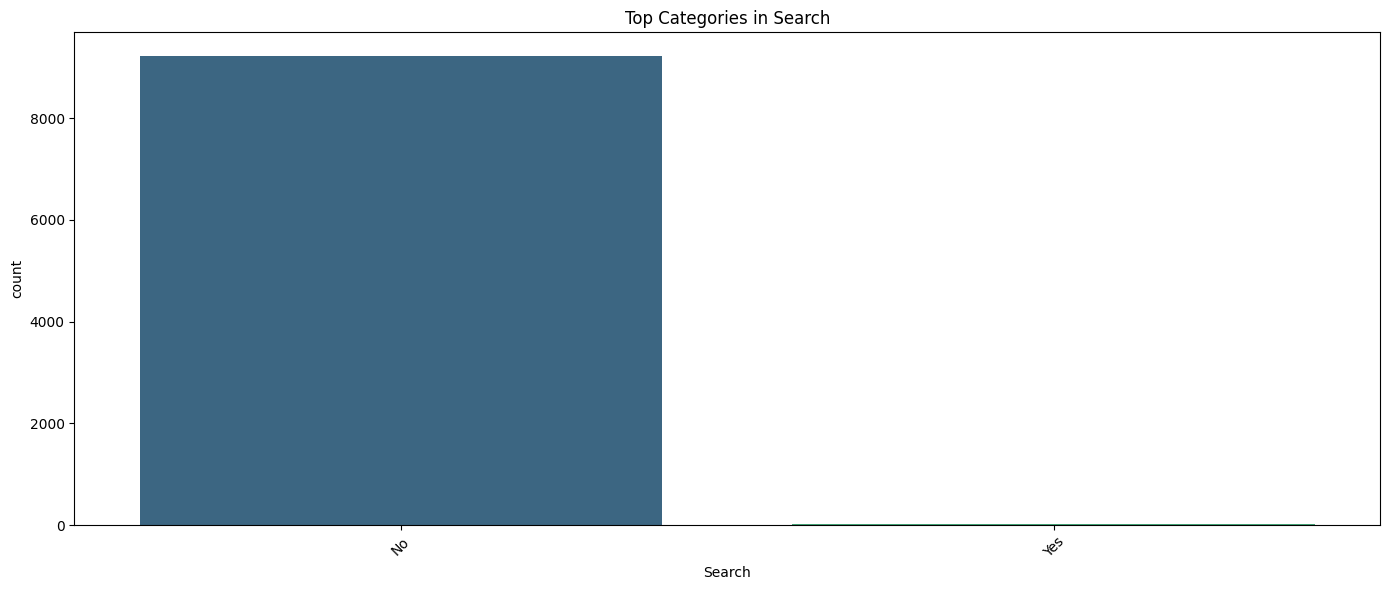

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


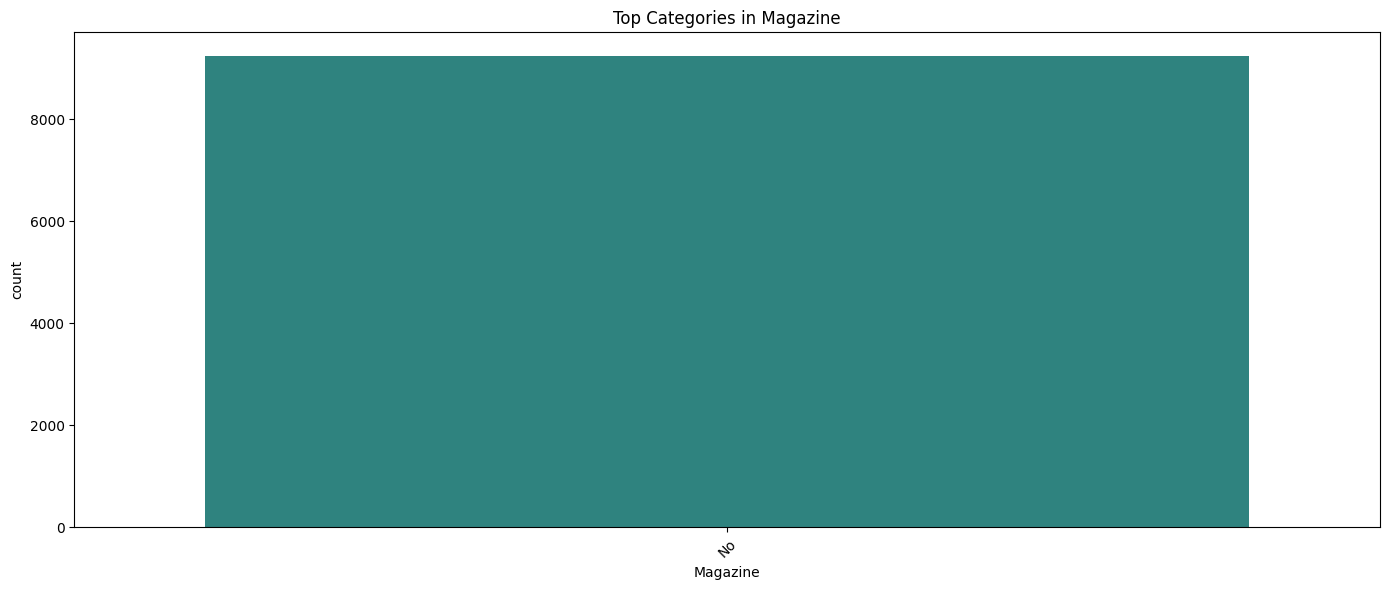

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


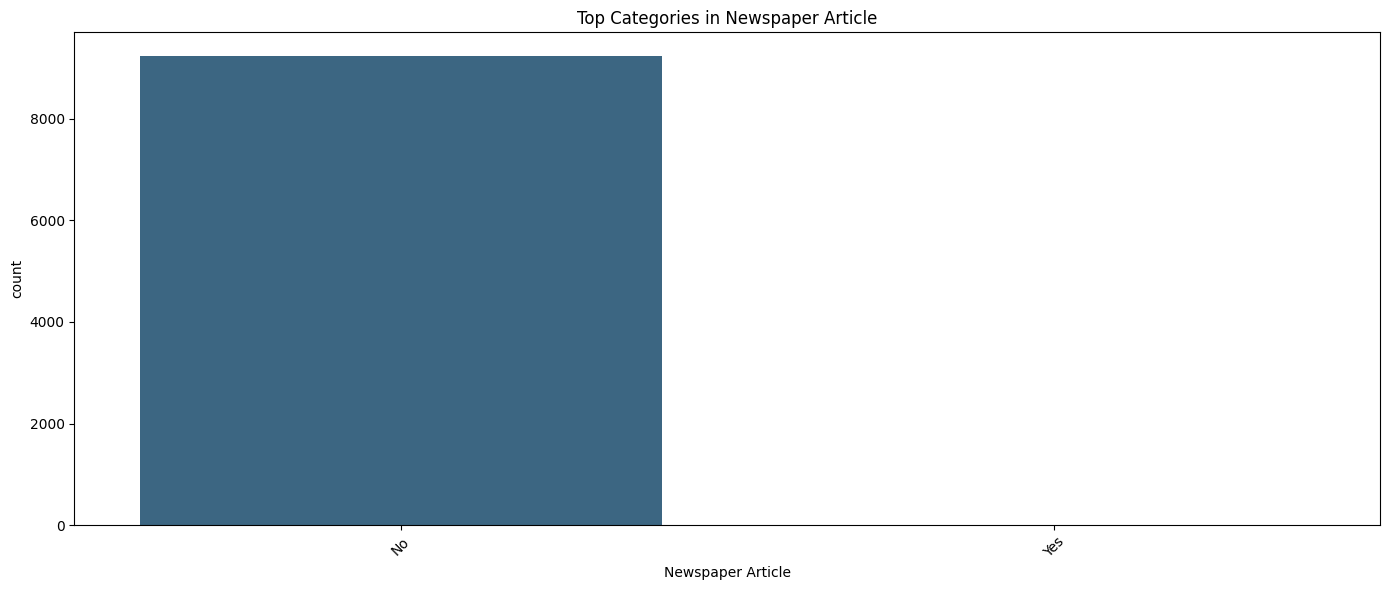

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


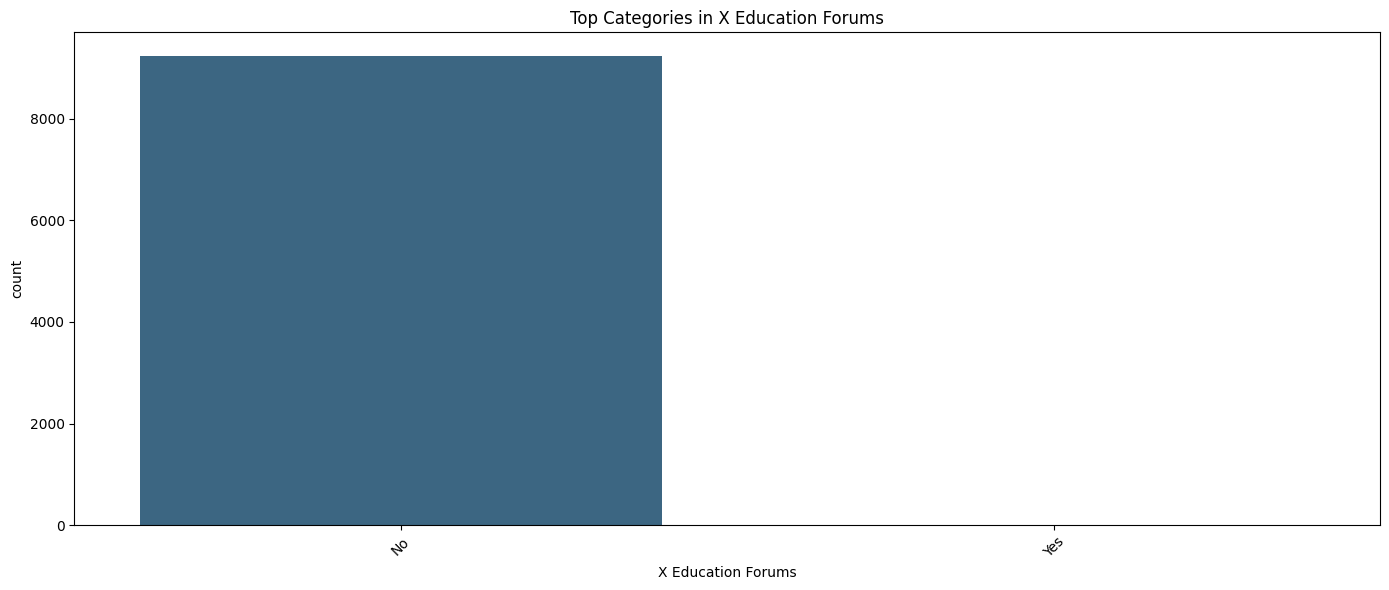

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


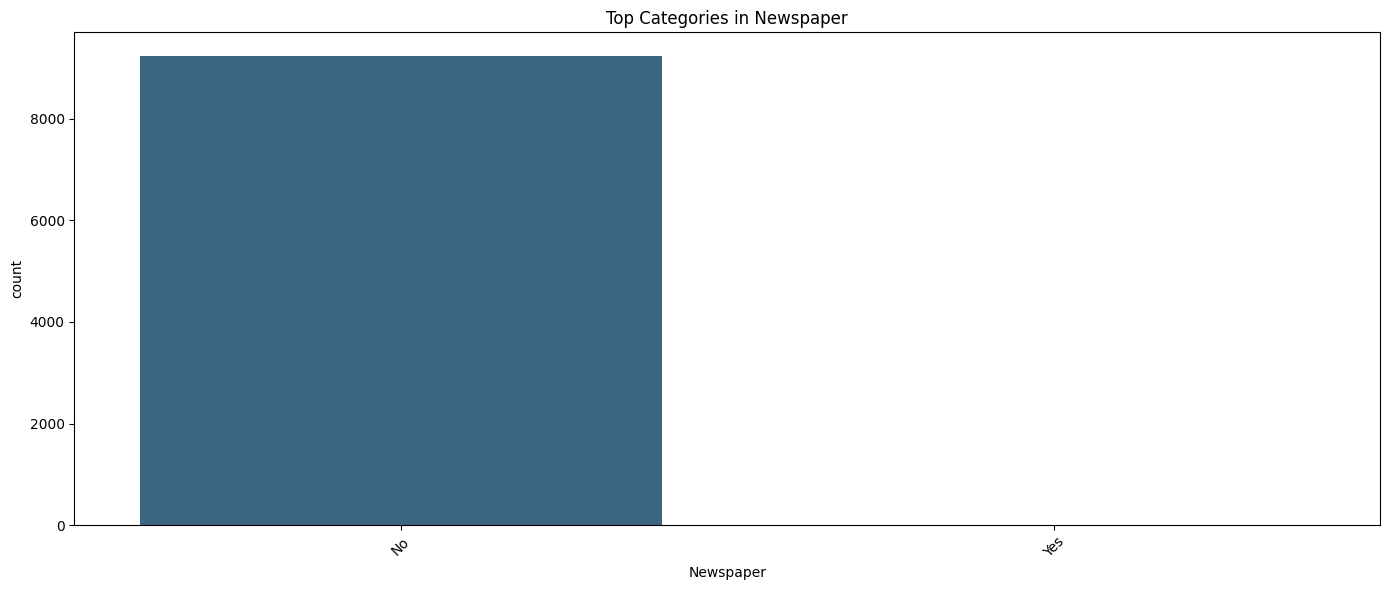

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


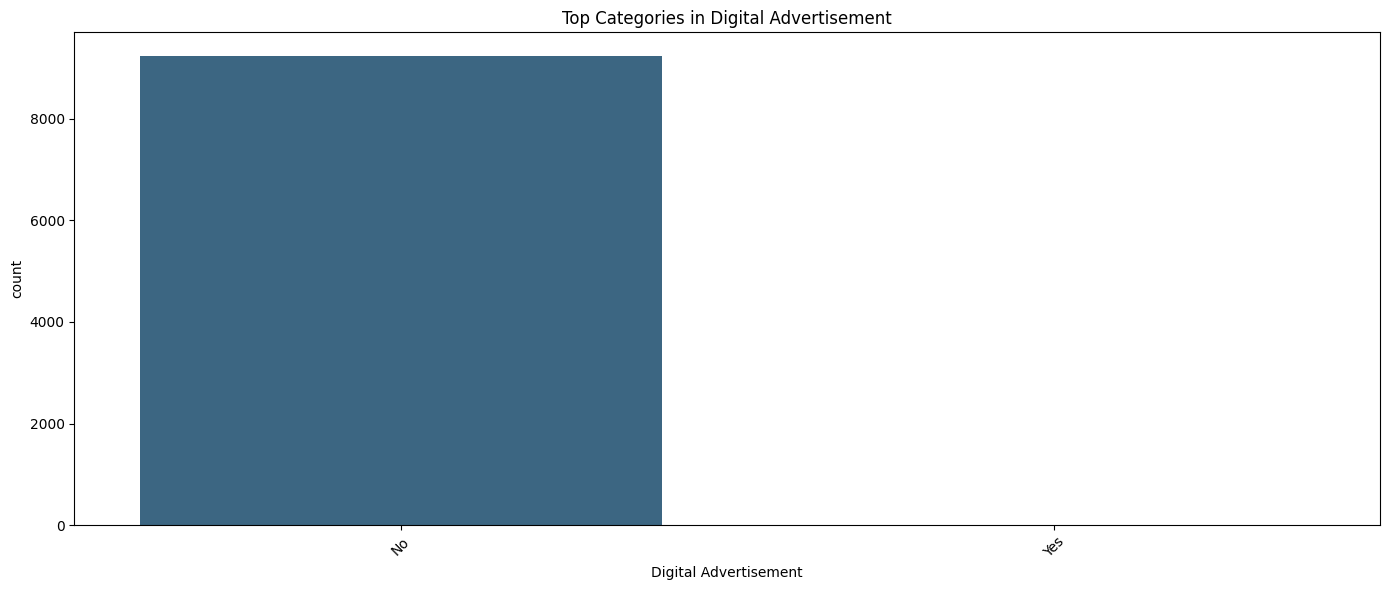

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


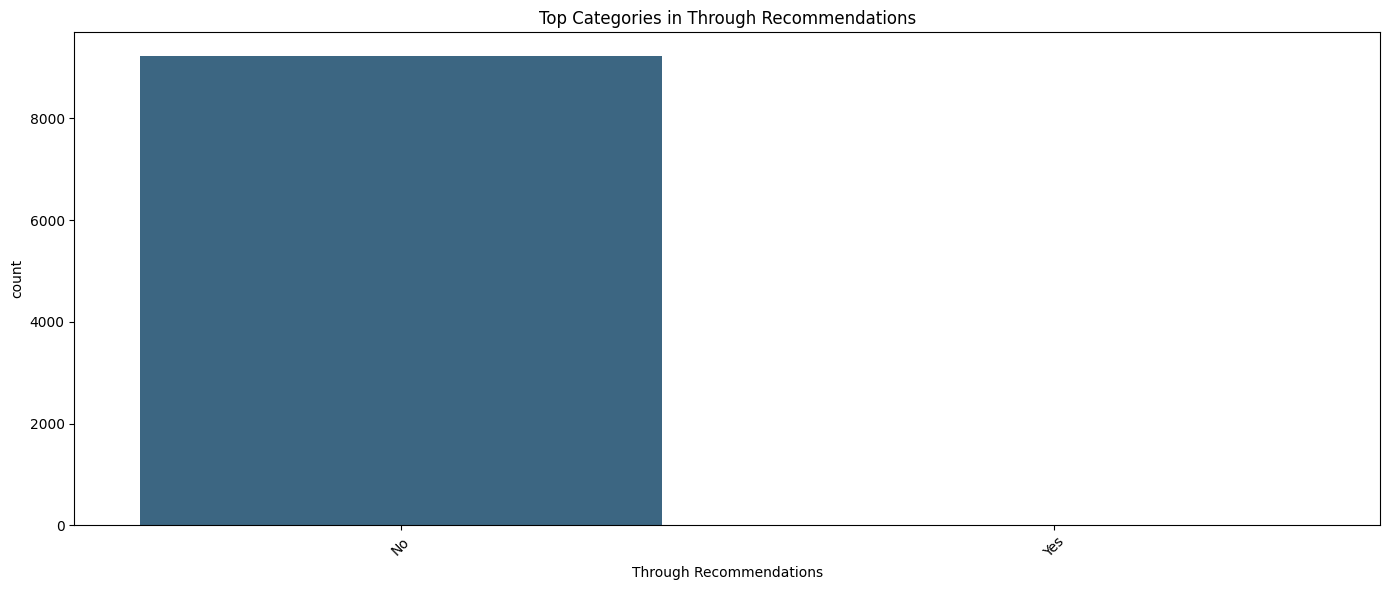

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


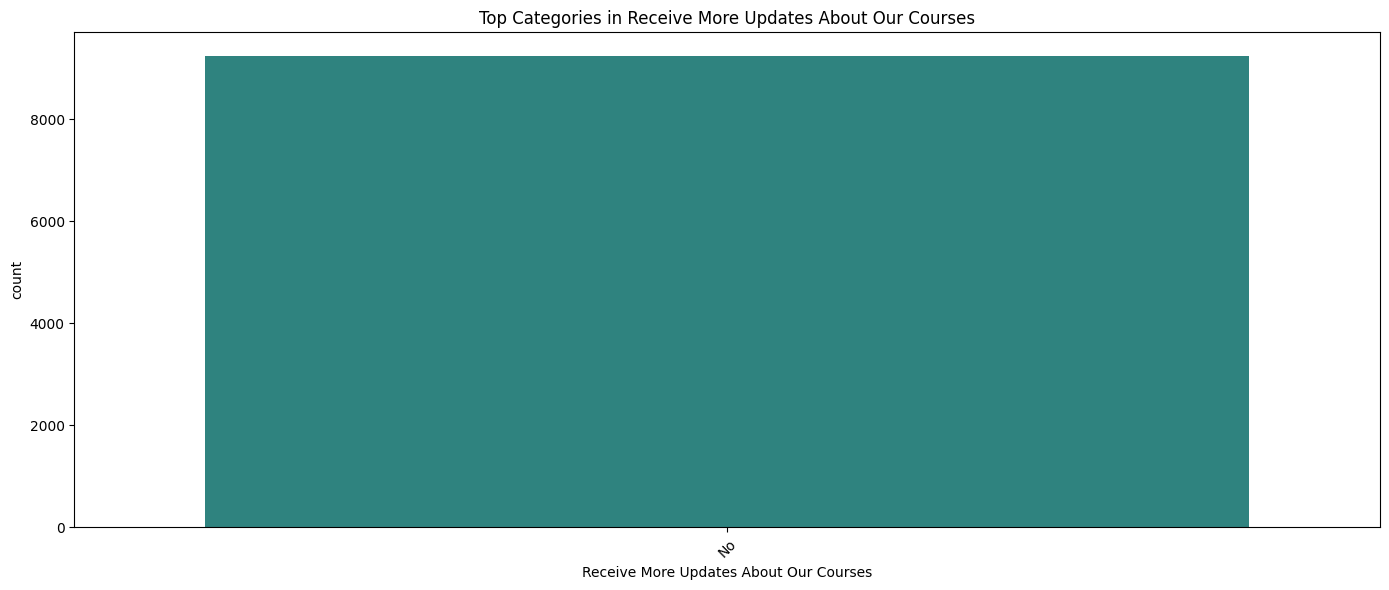

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


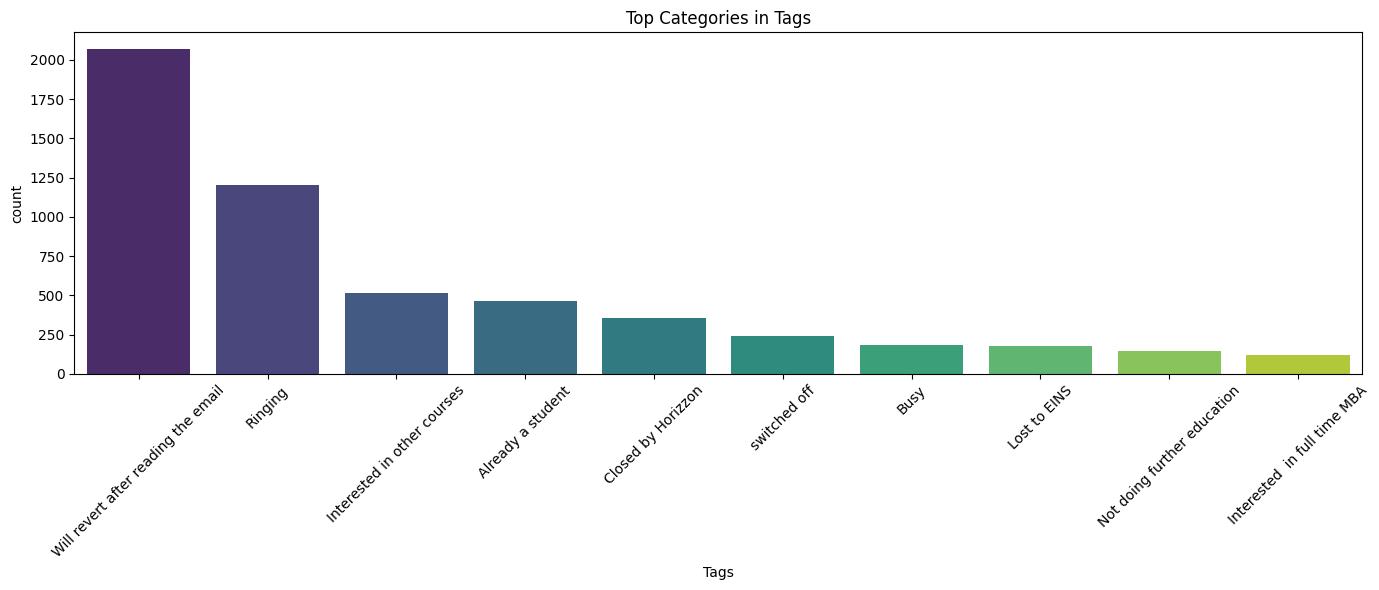

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


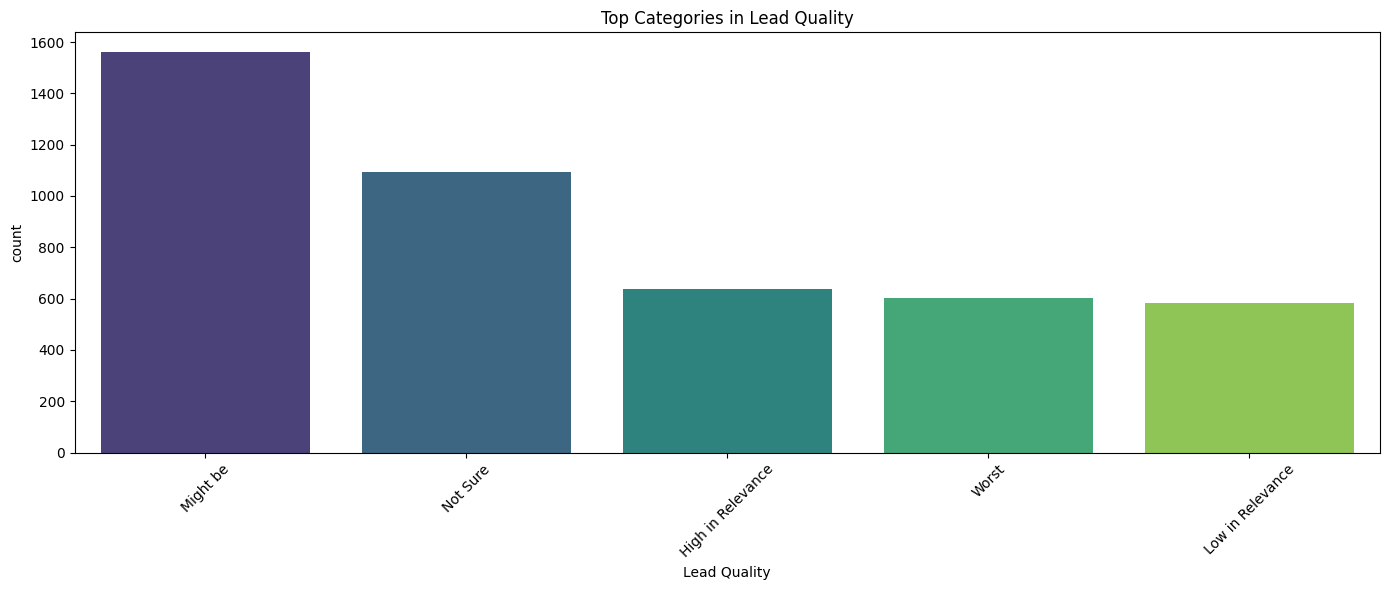

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


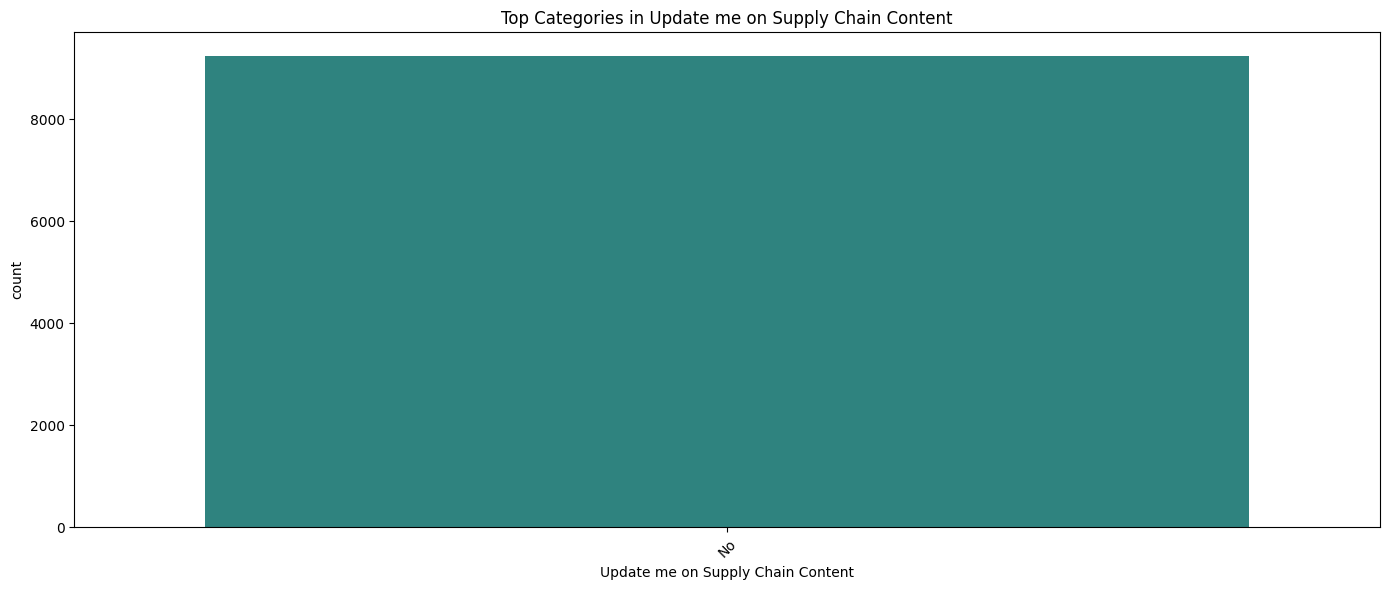

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


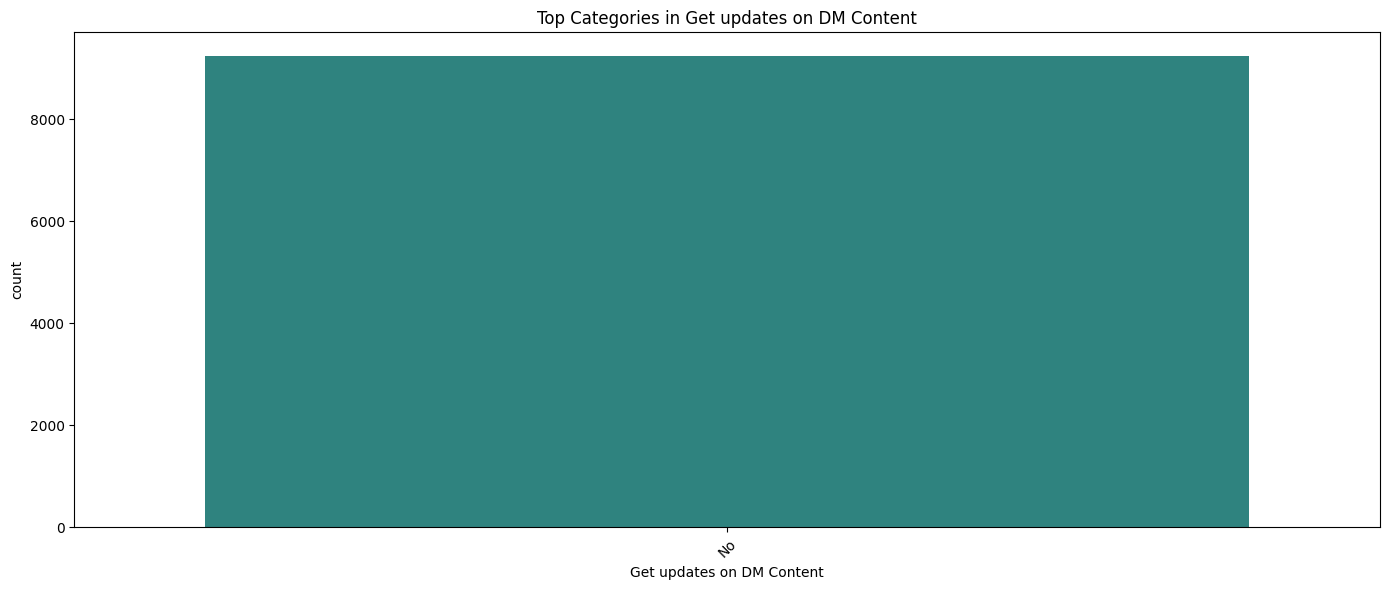

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


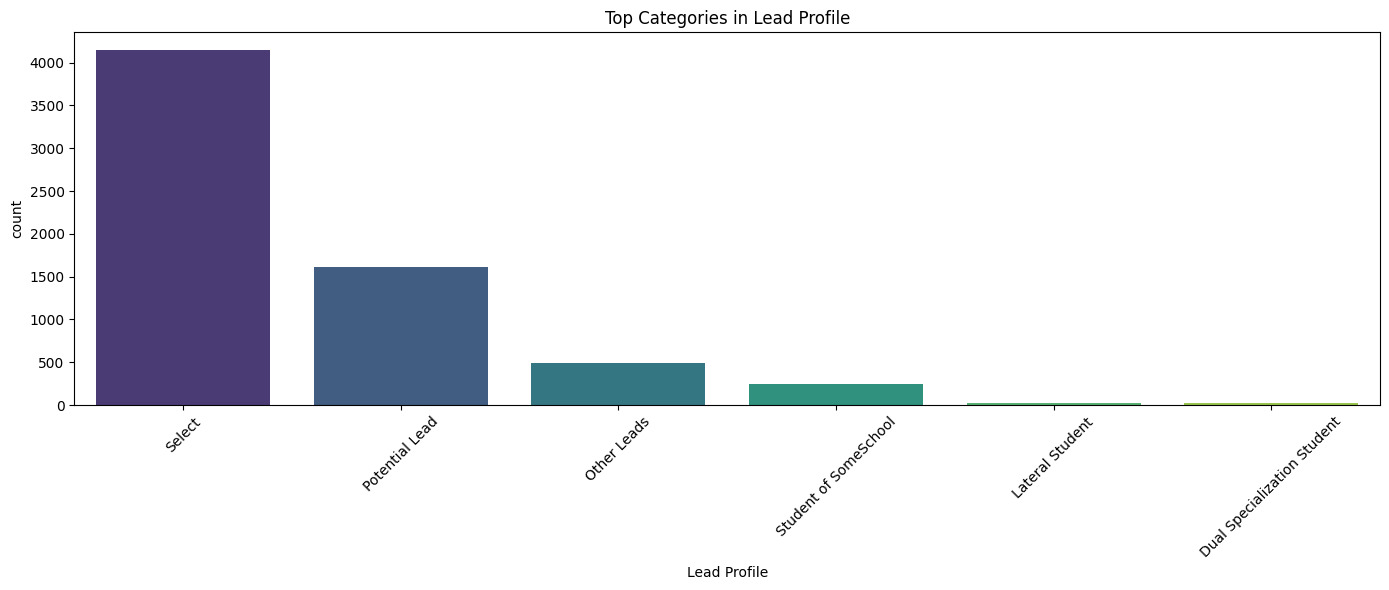

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


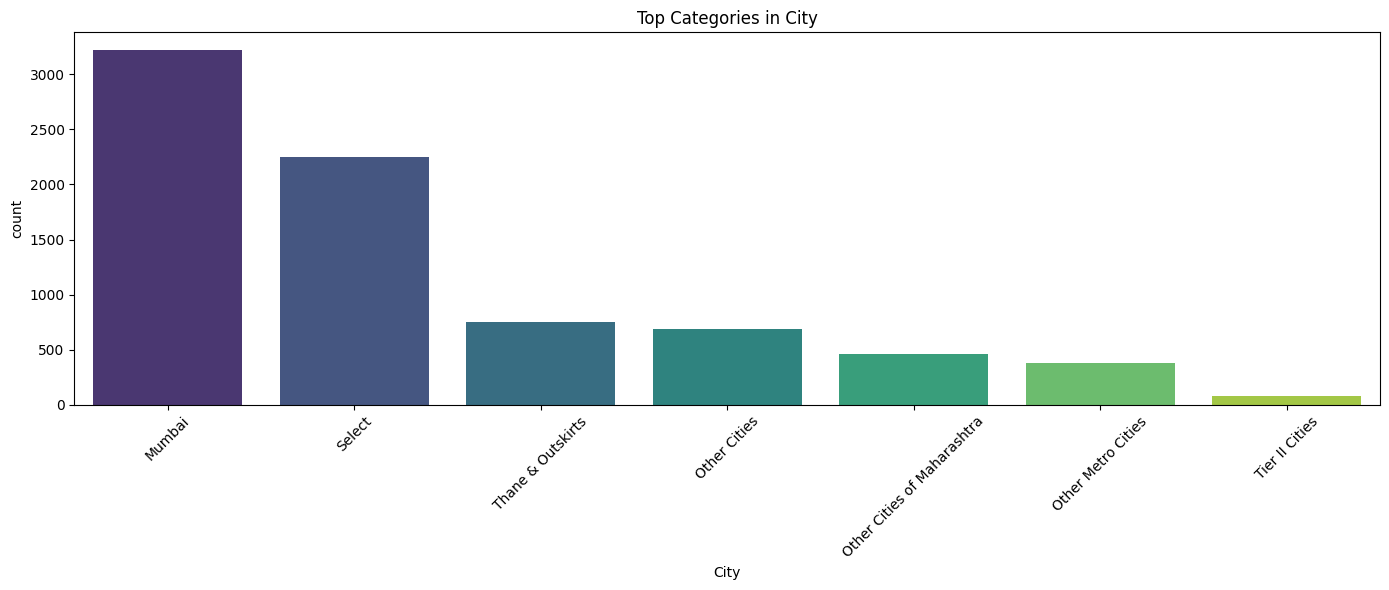

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


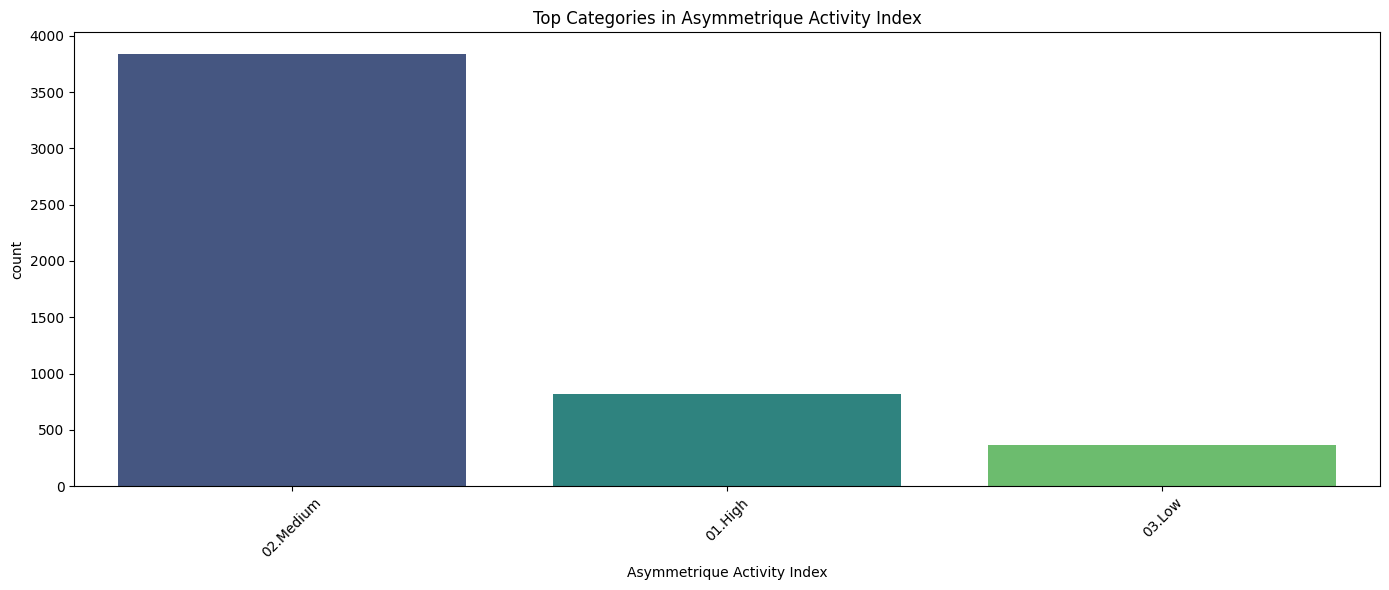

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


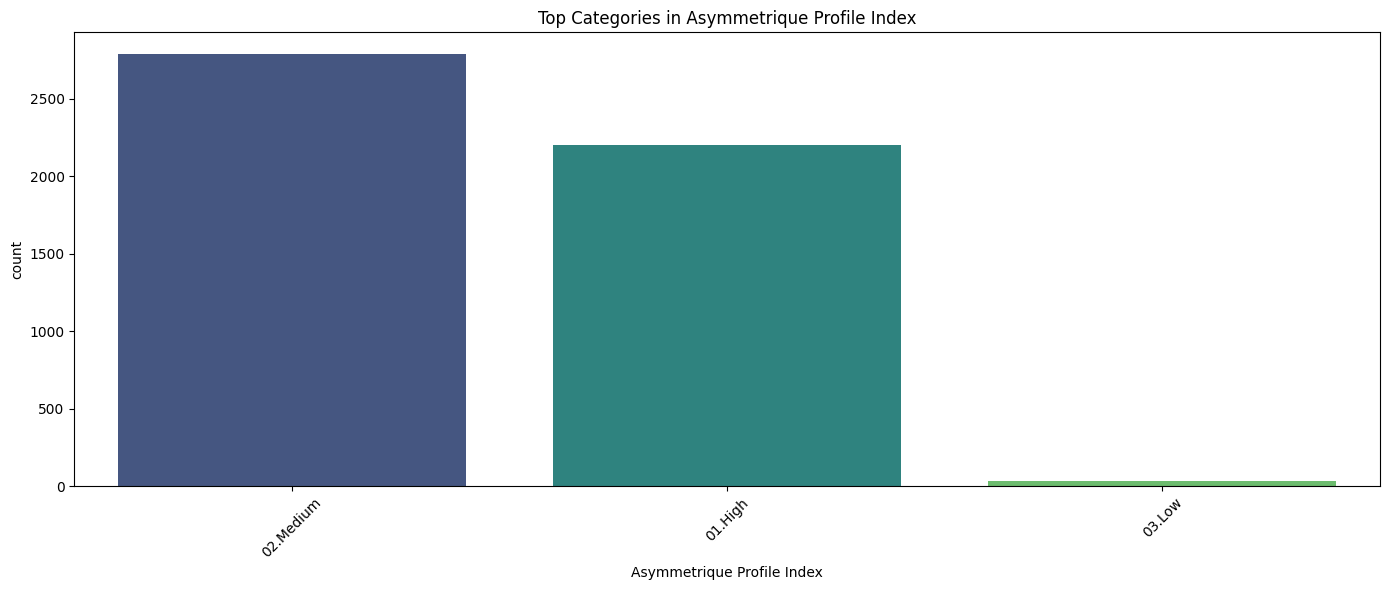

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


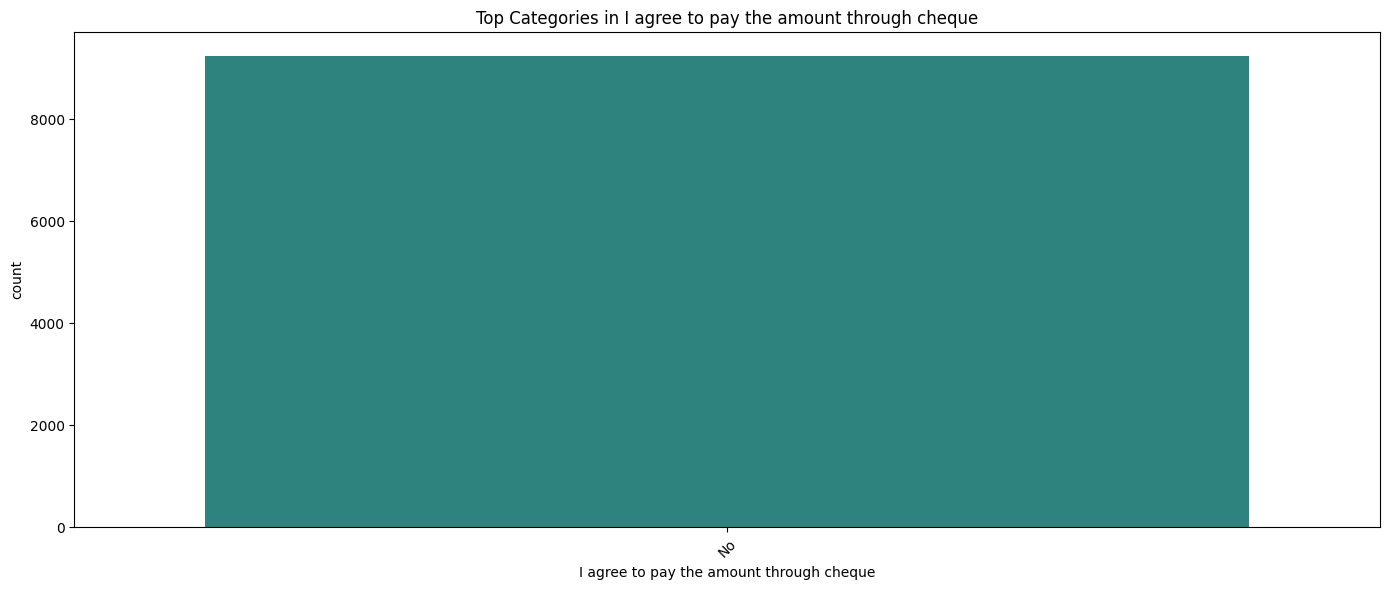

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


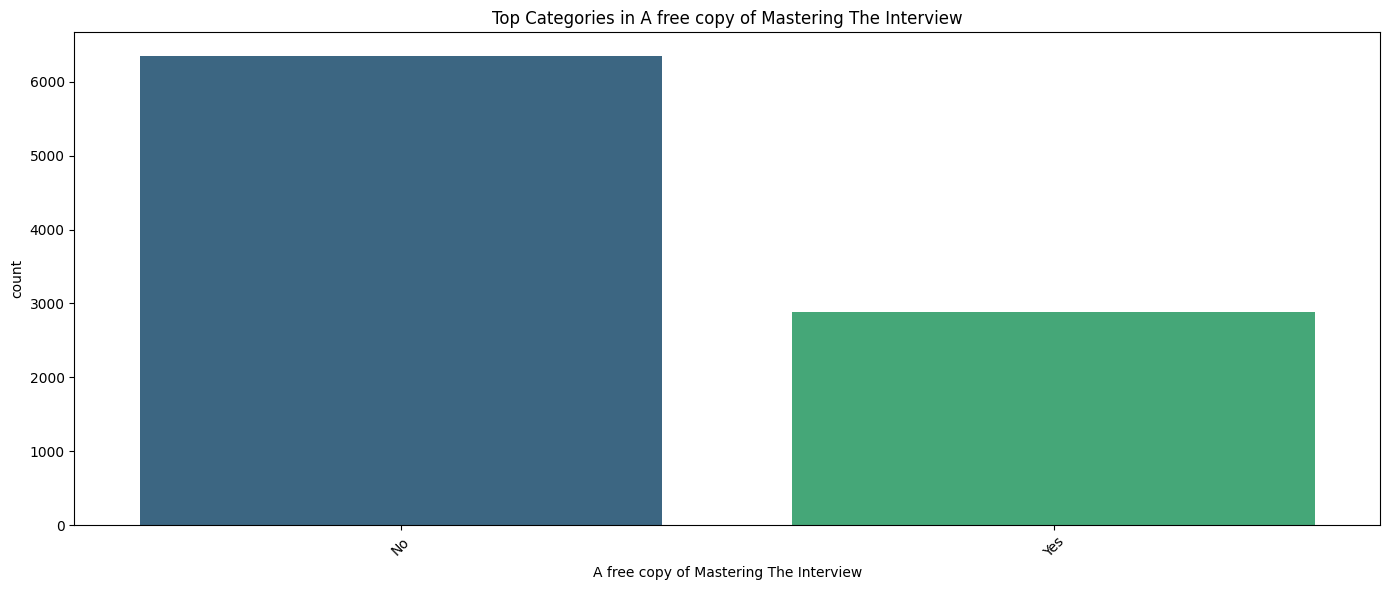

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\632298062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis')


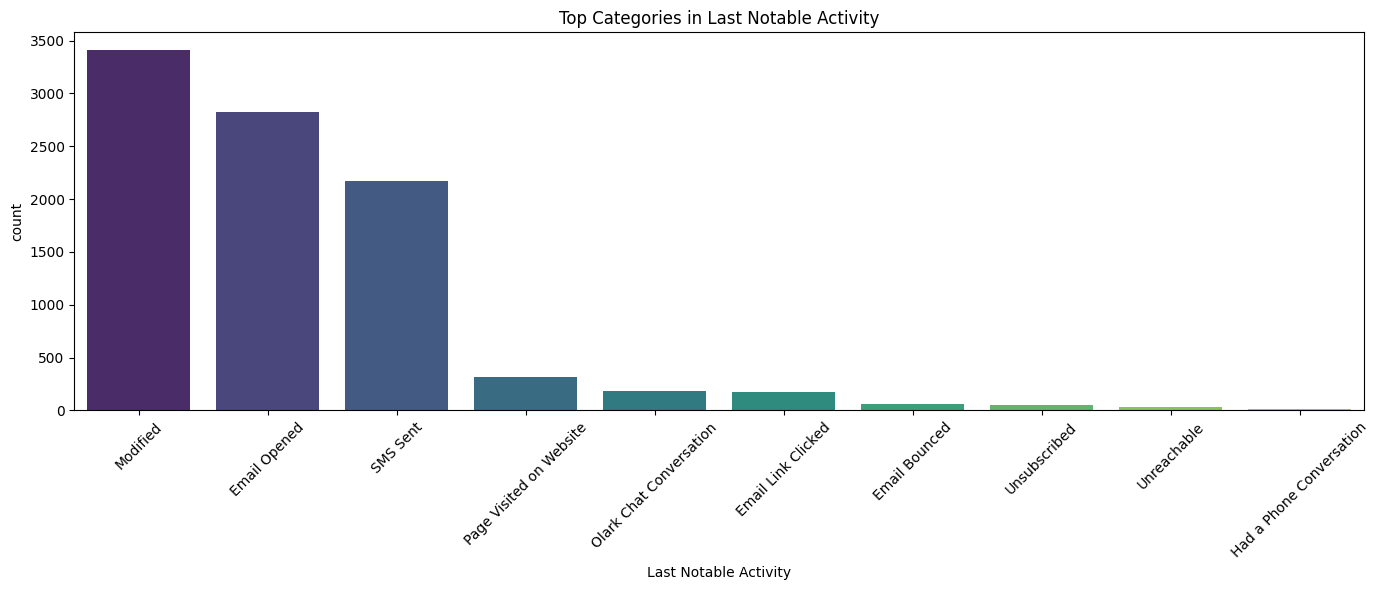

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


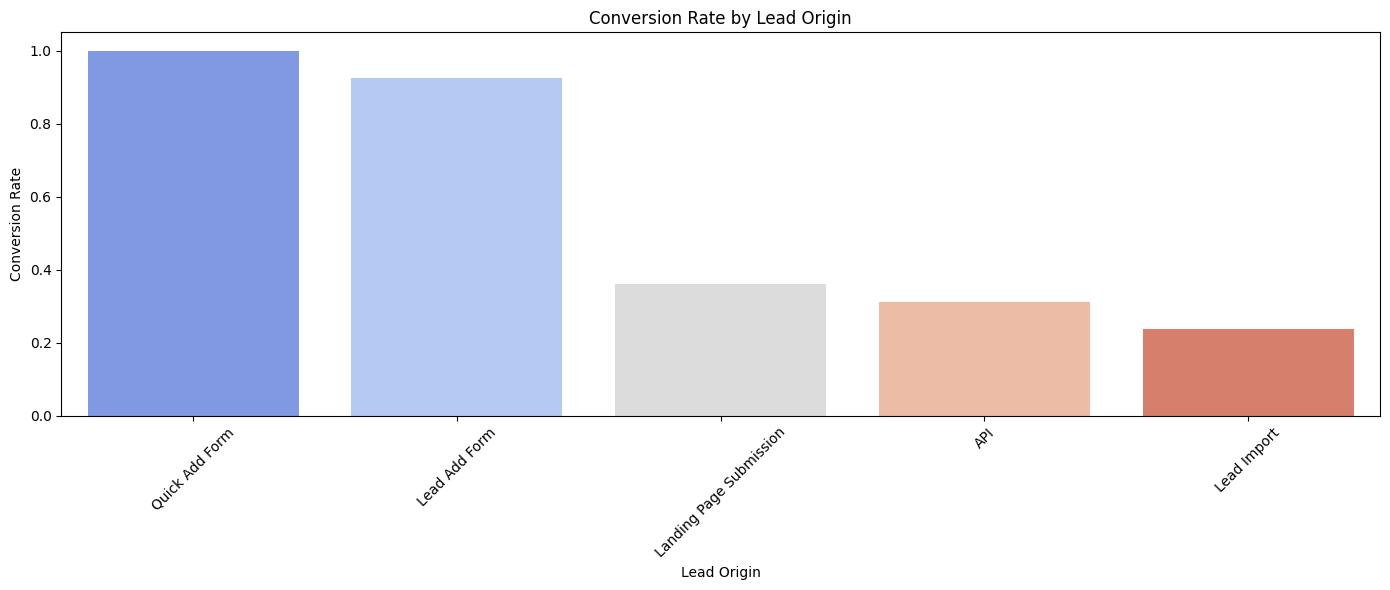

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


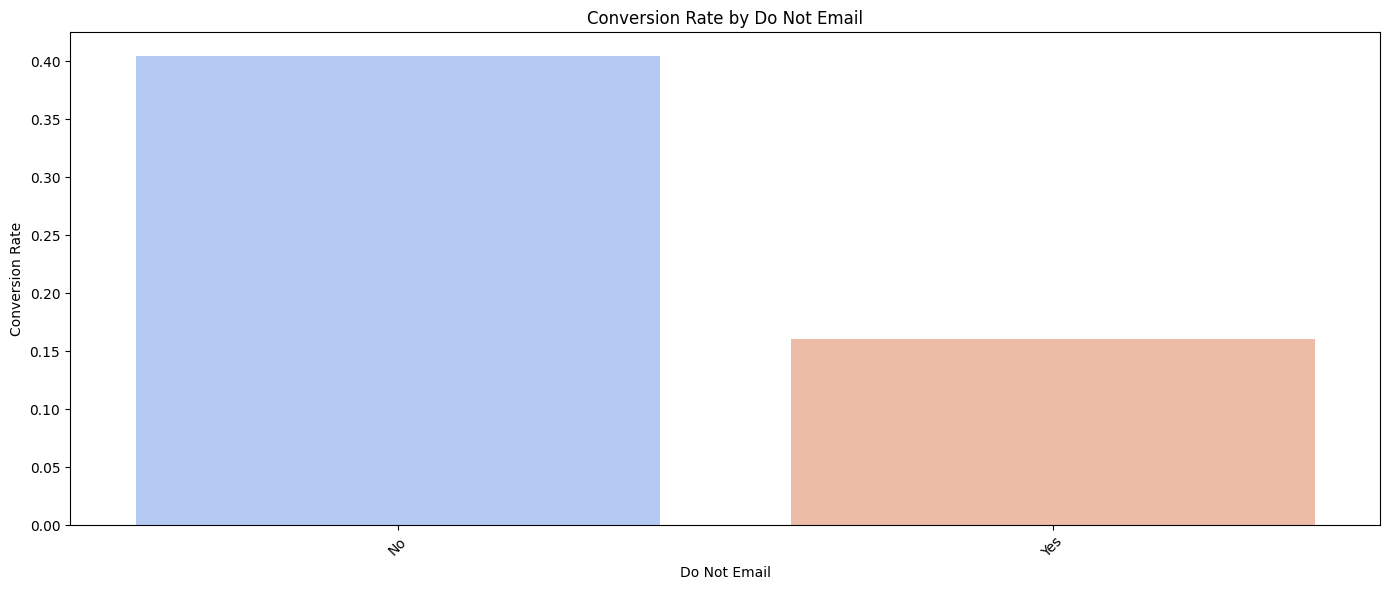

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


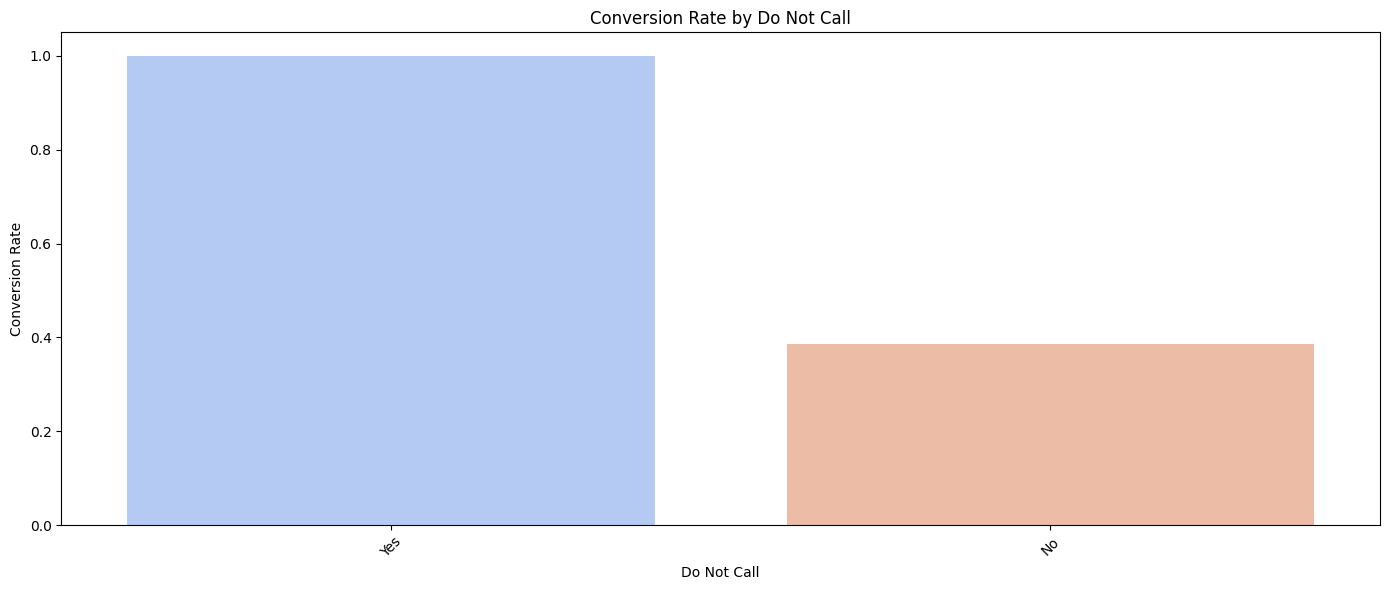

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


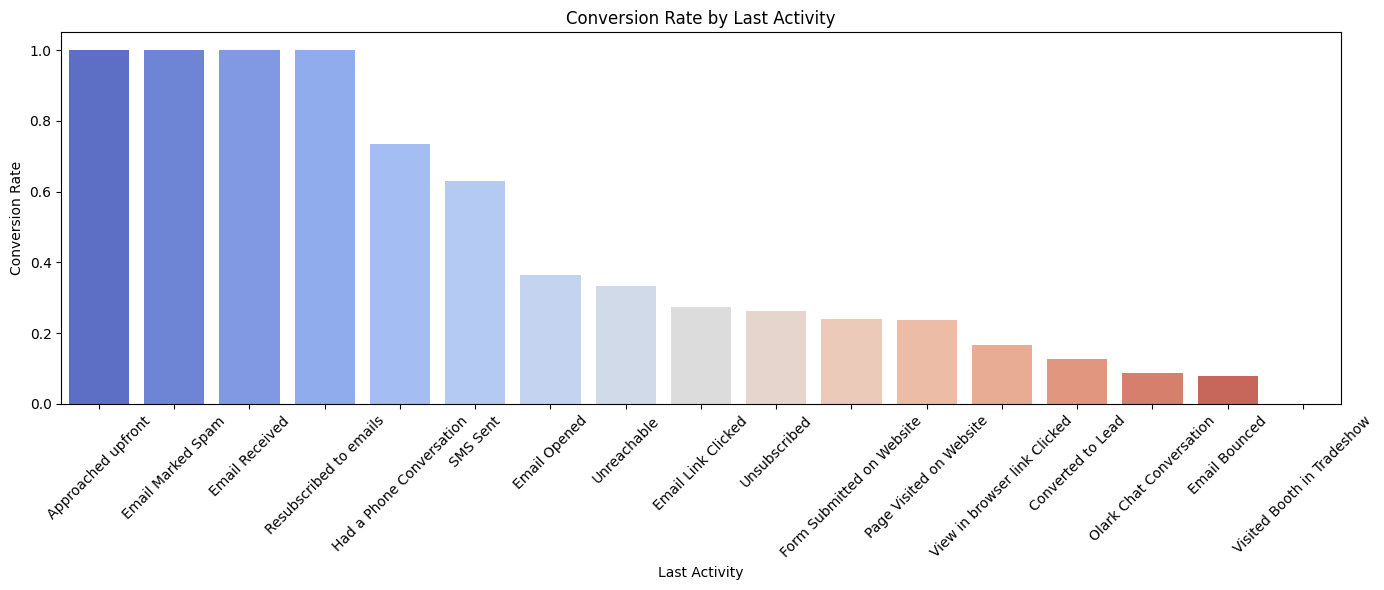

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


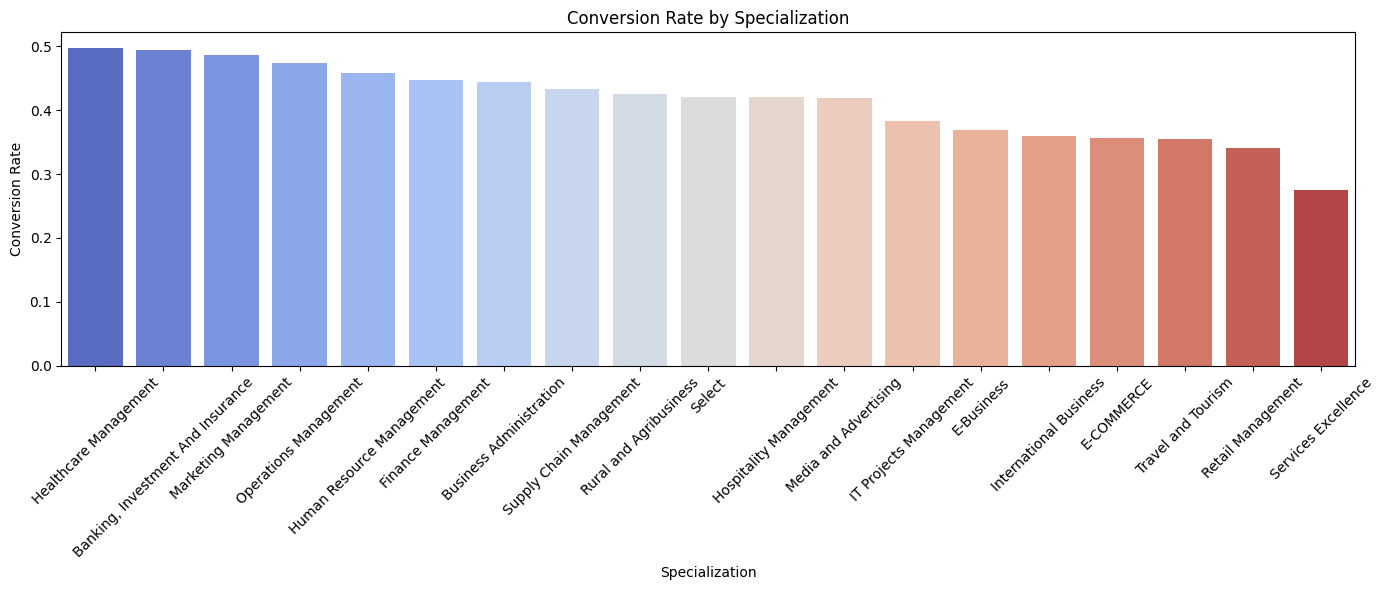

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


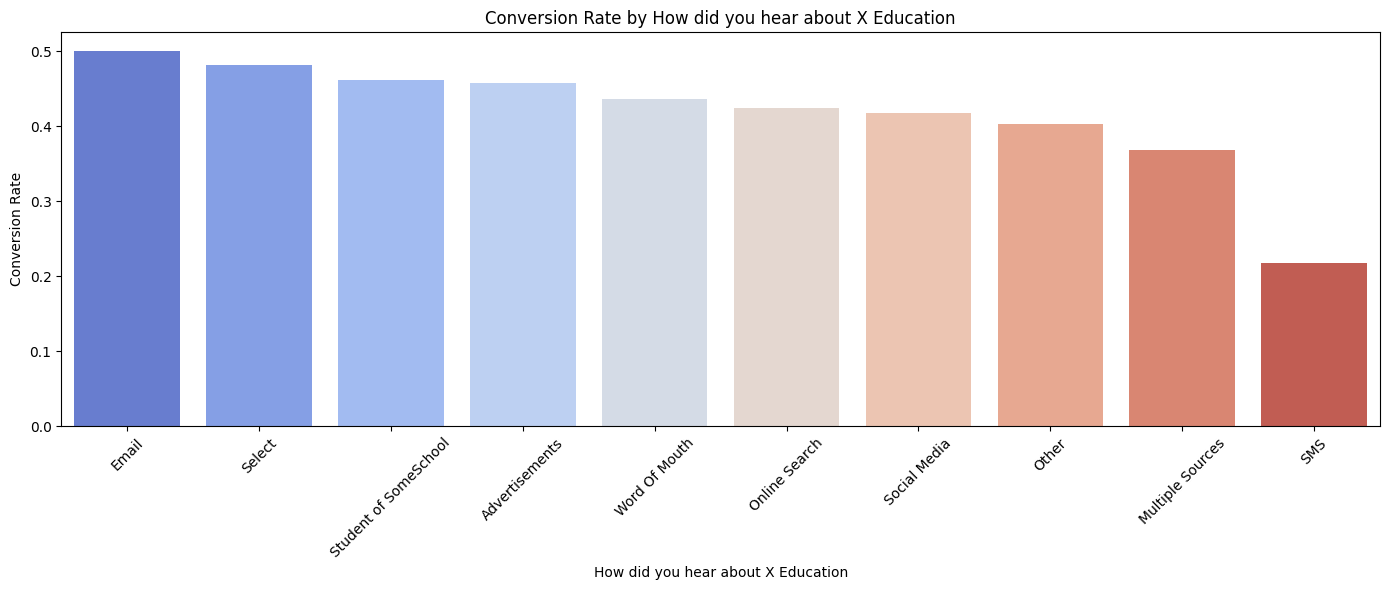

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


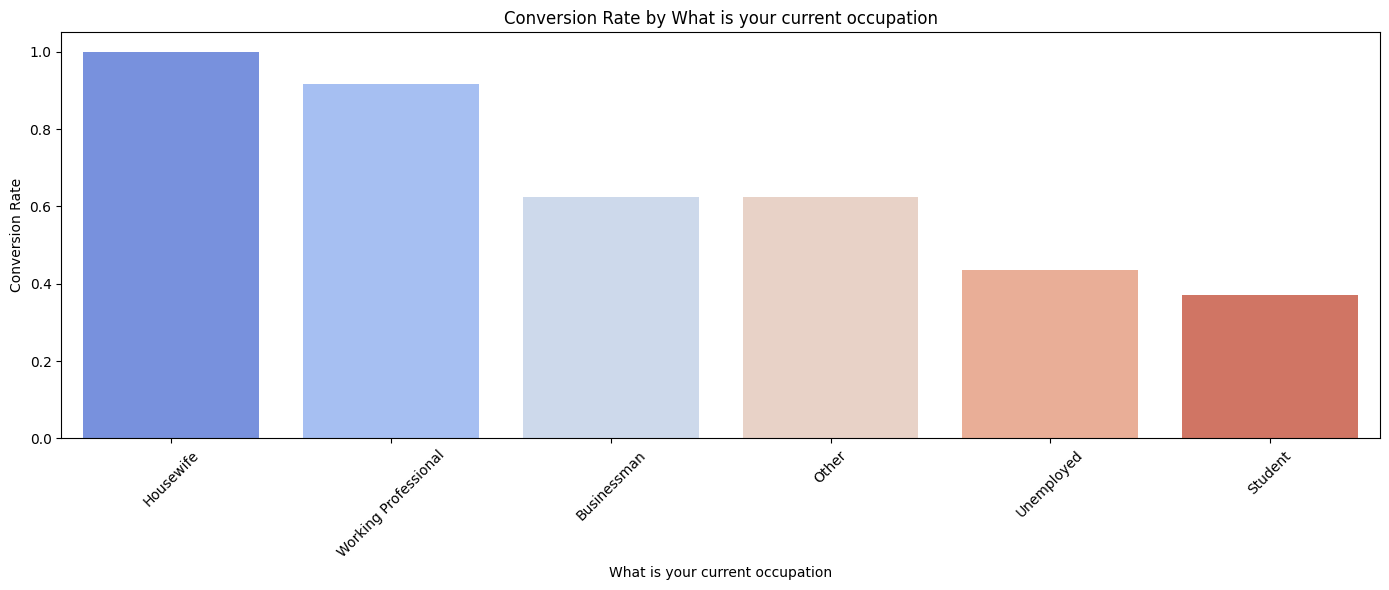

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


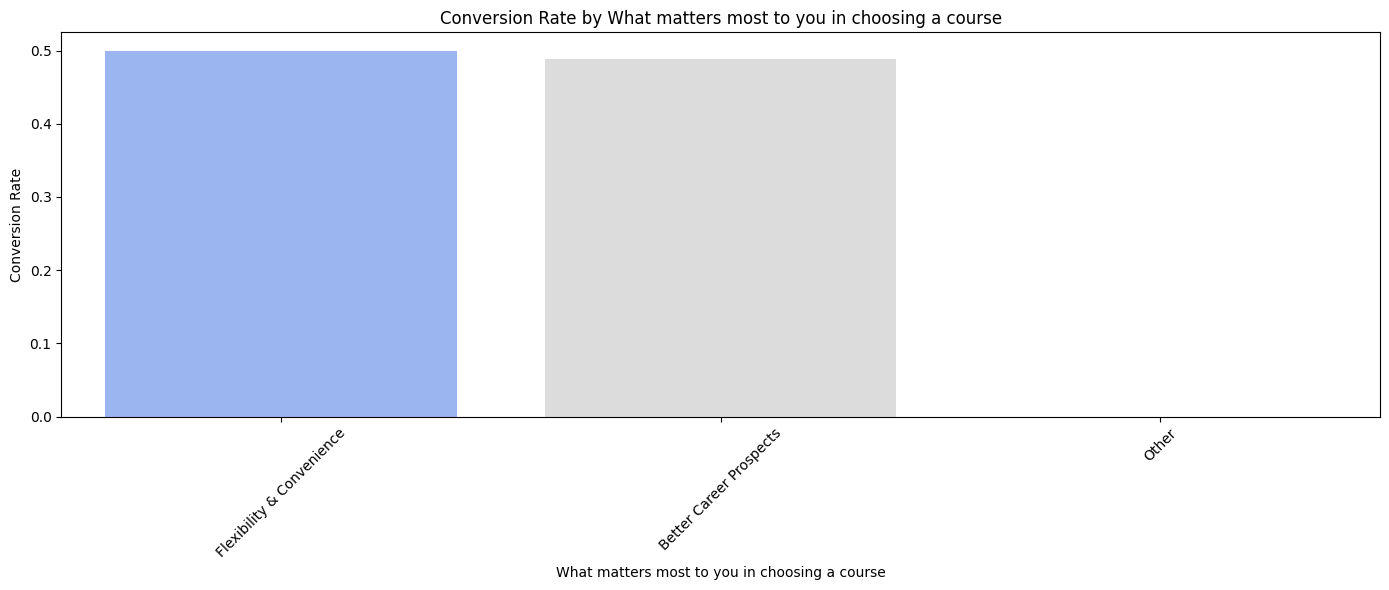

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


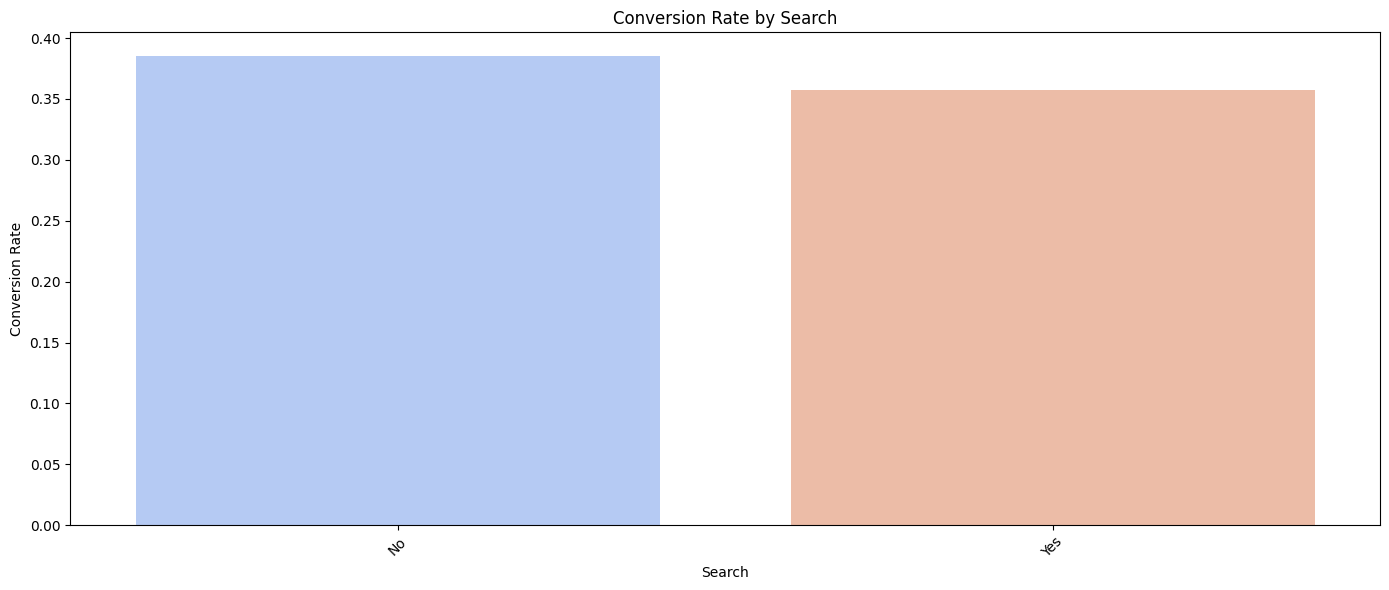

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


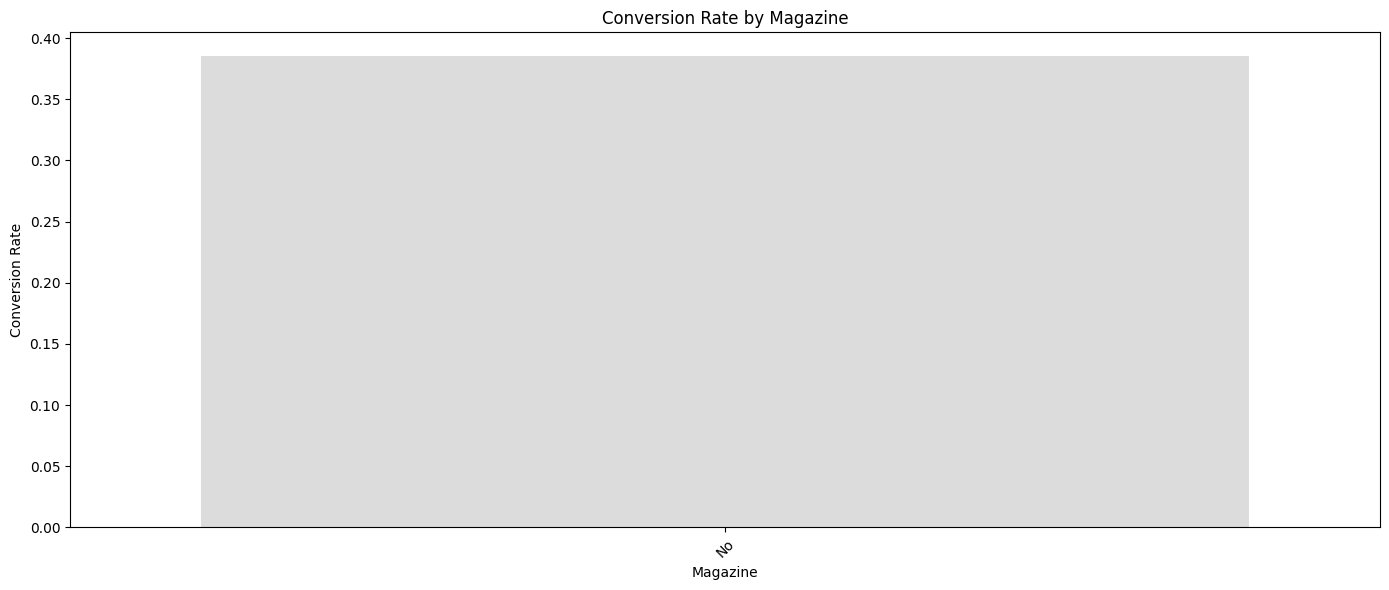

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


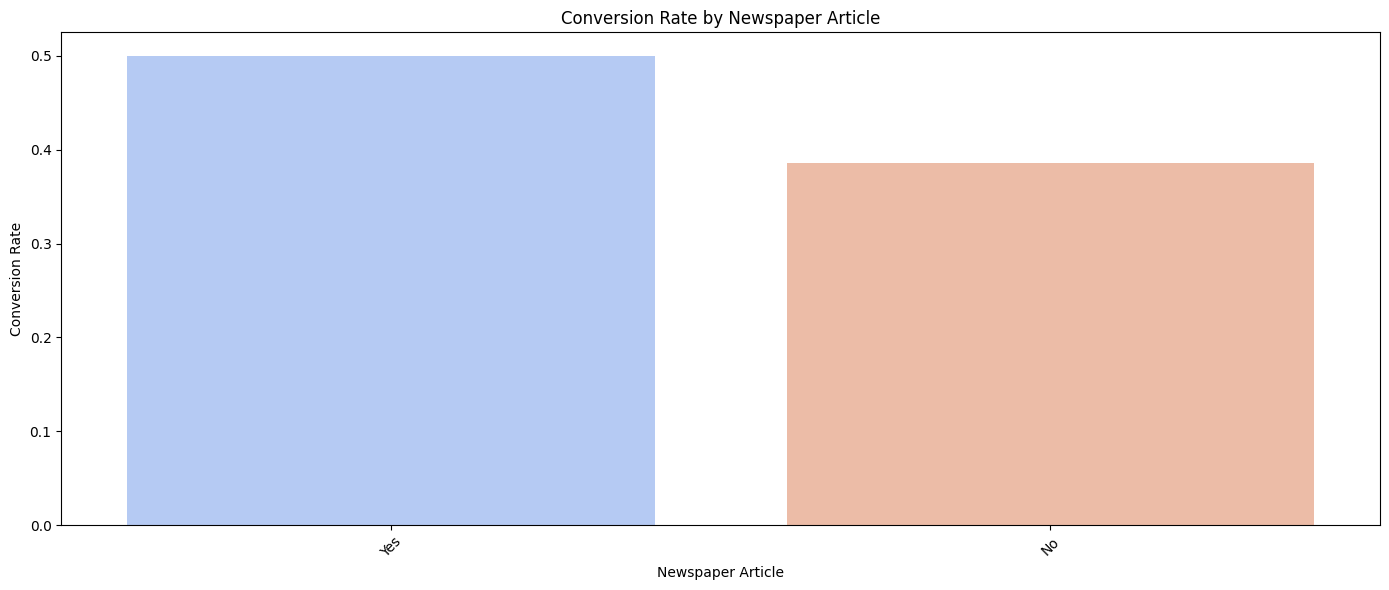

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


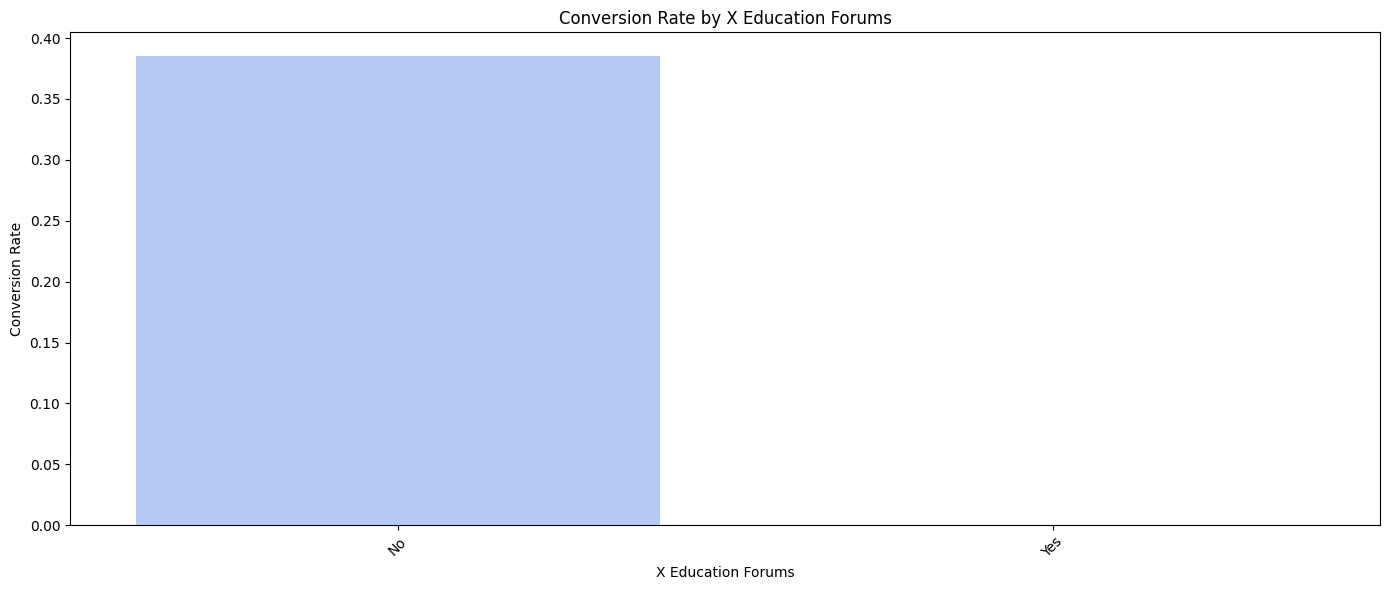

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


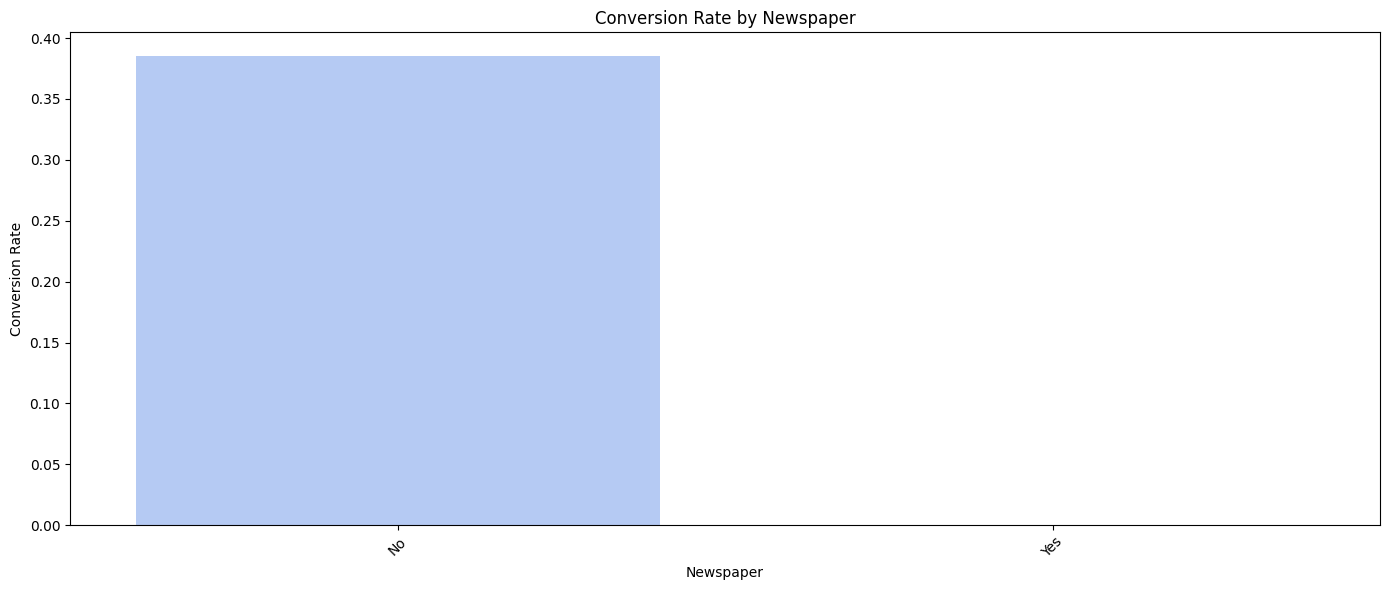

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


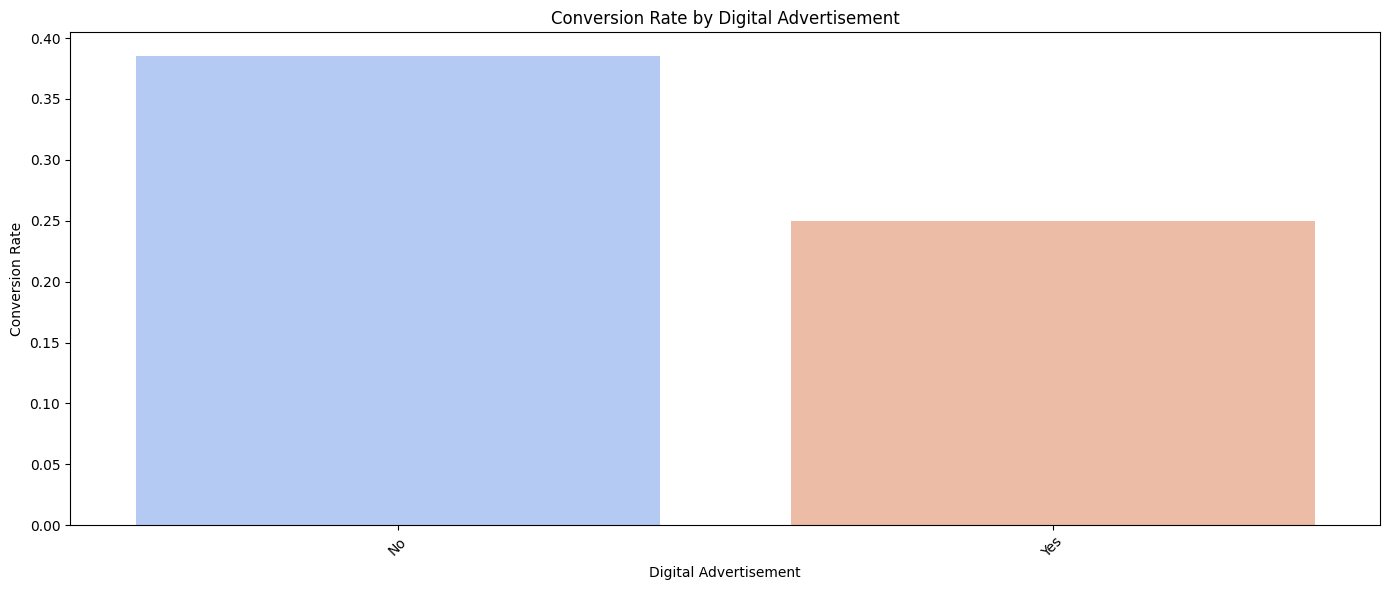

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


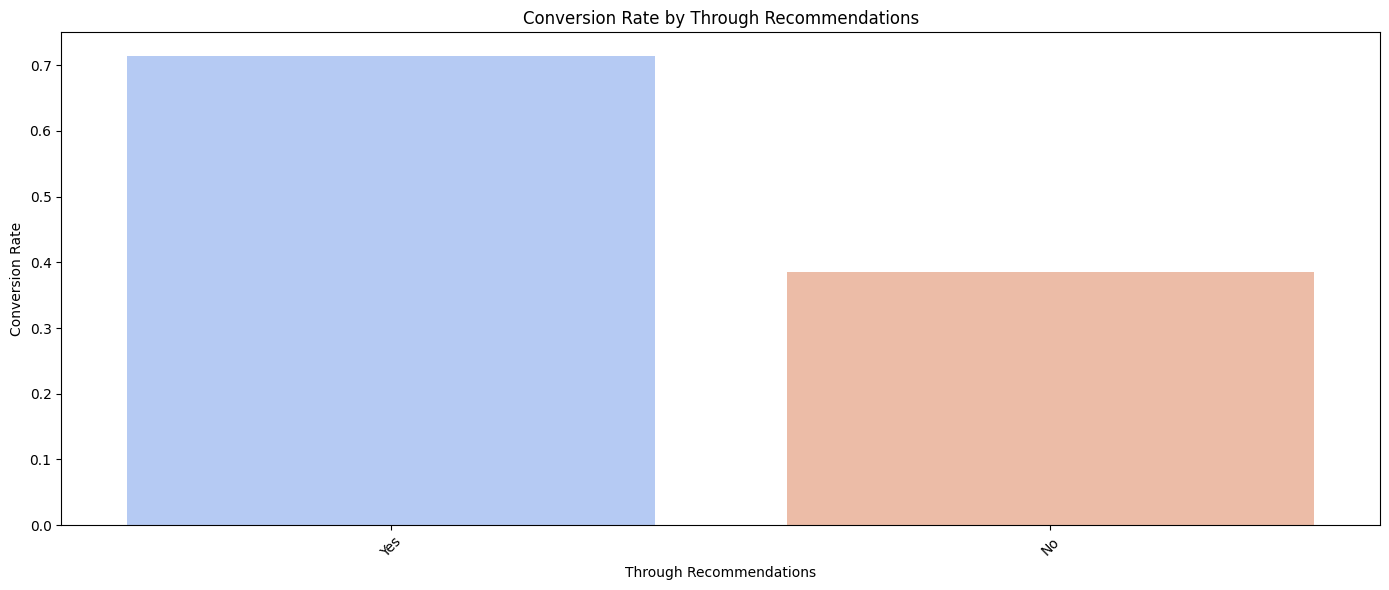

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


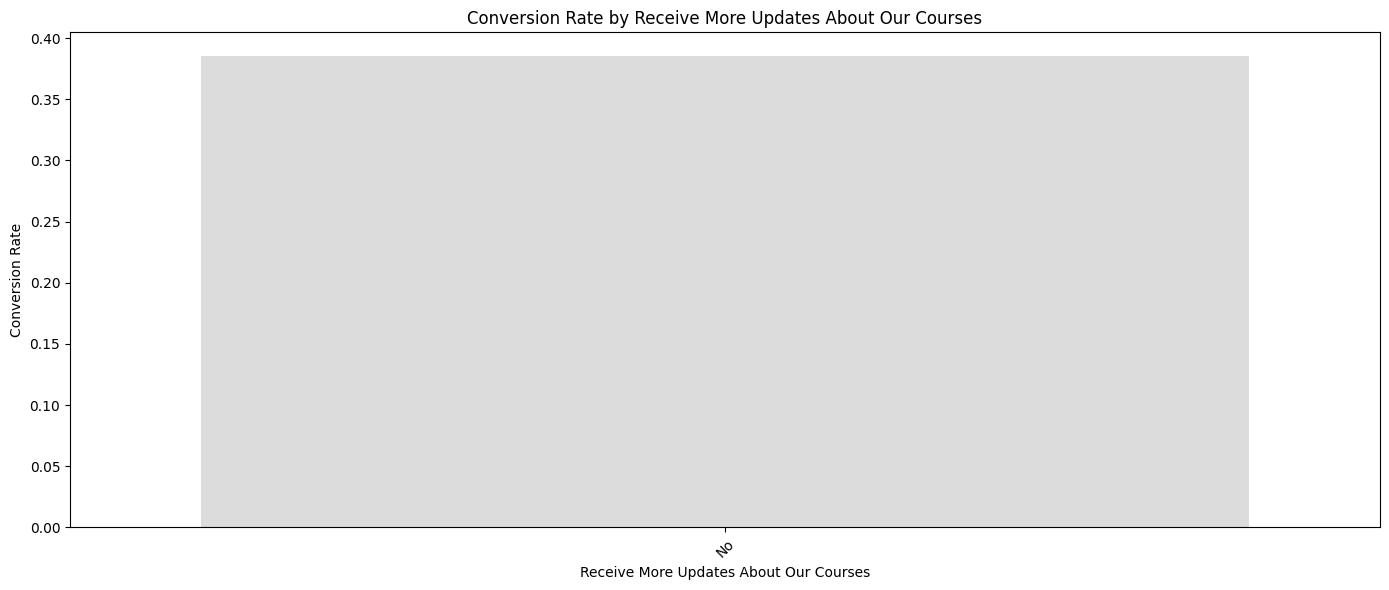

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


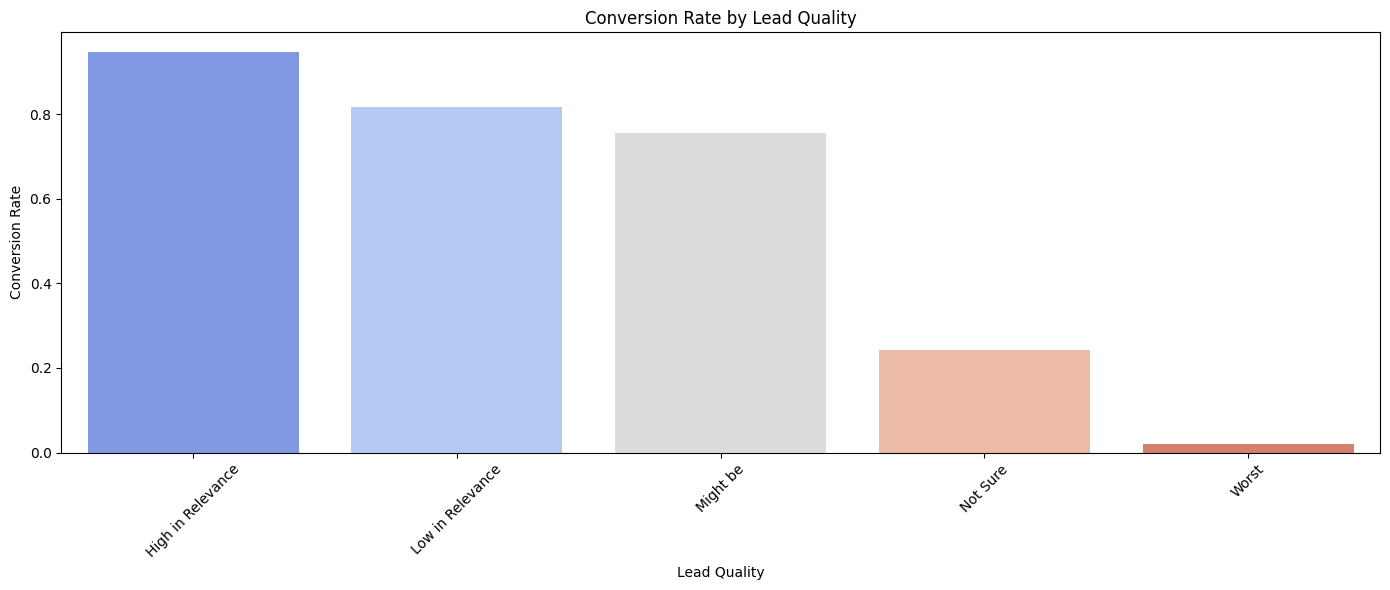

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


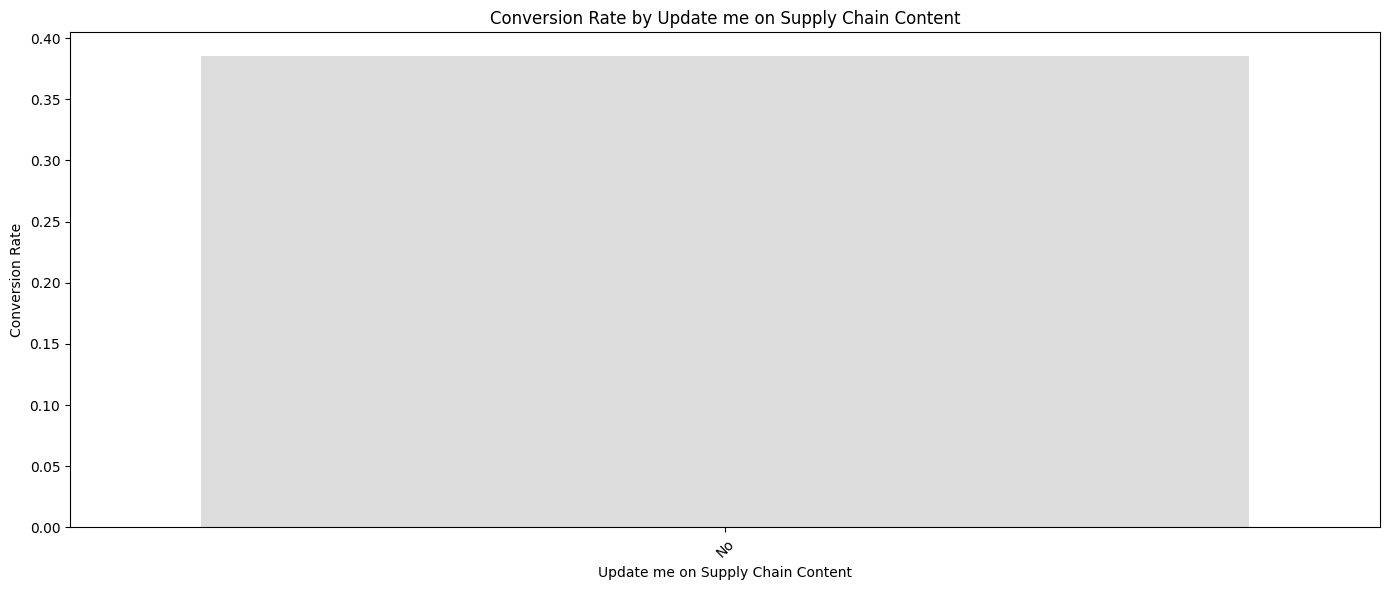

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


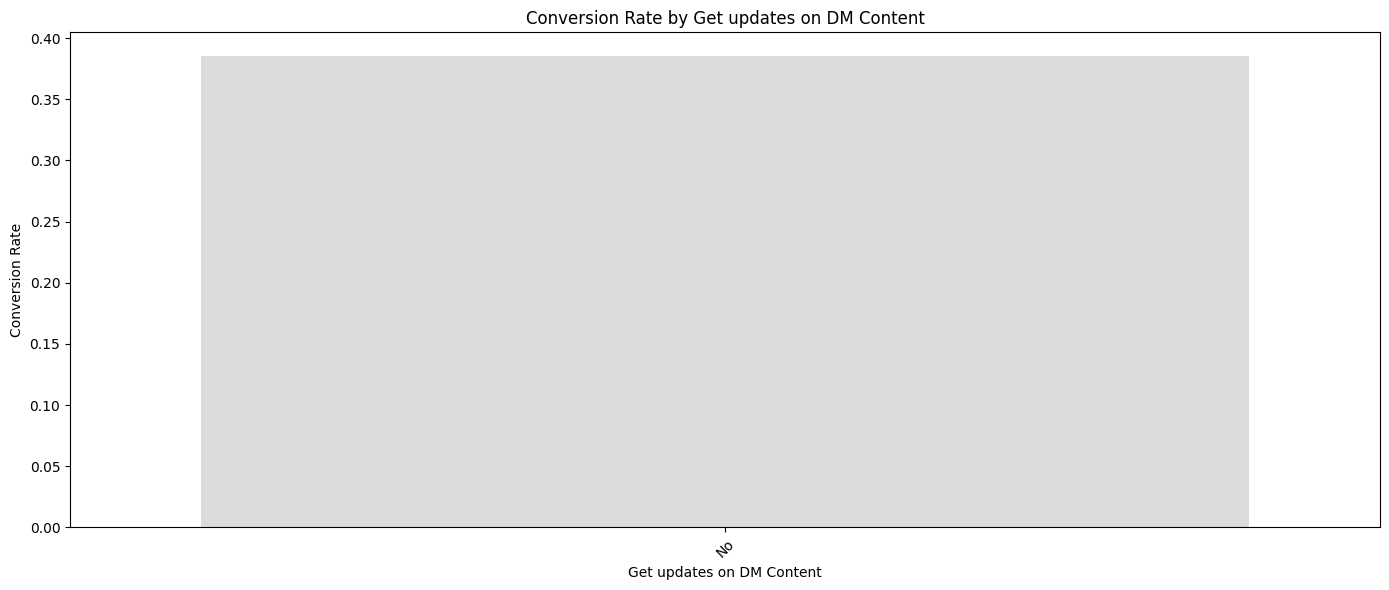

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


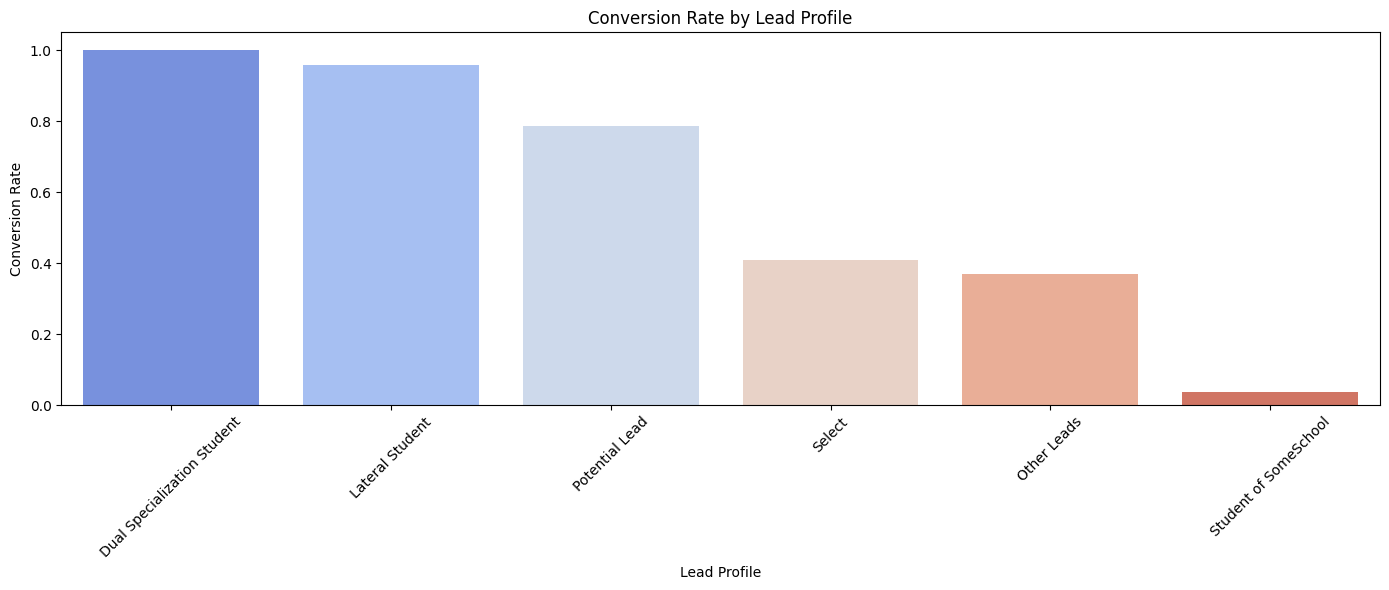

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


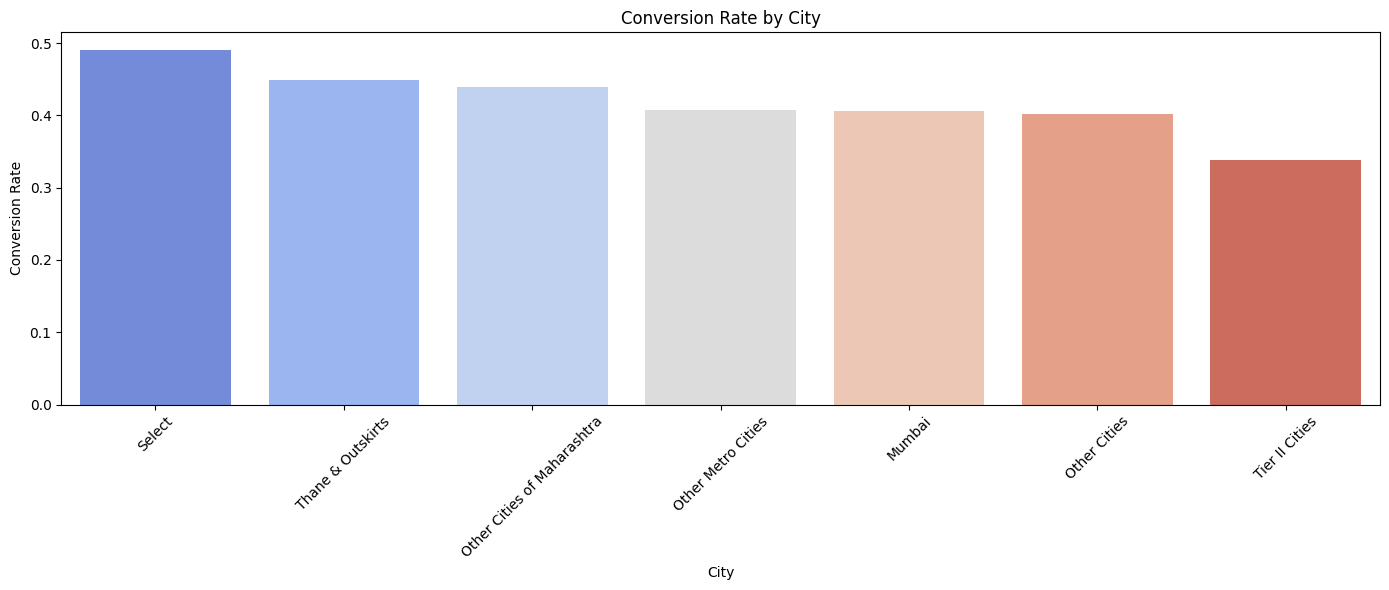

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


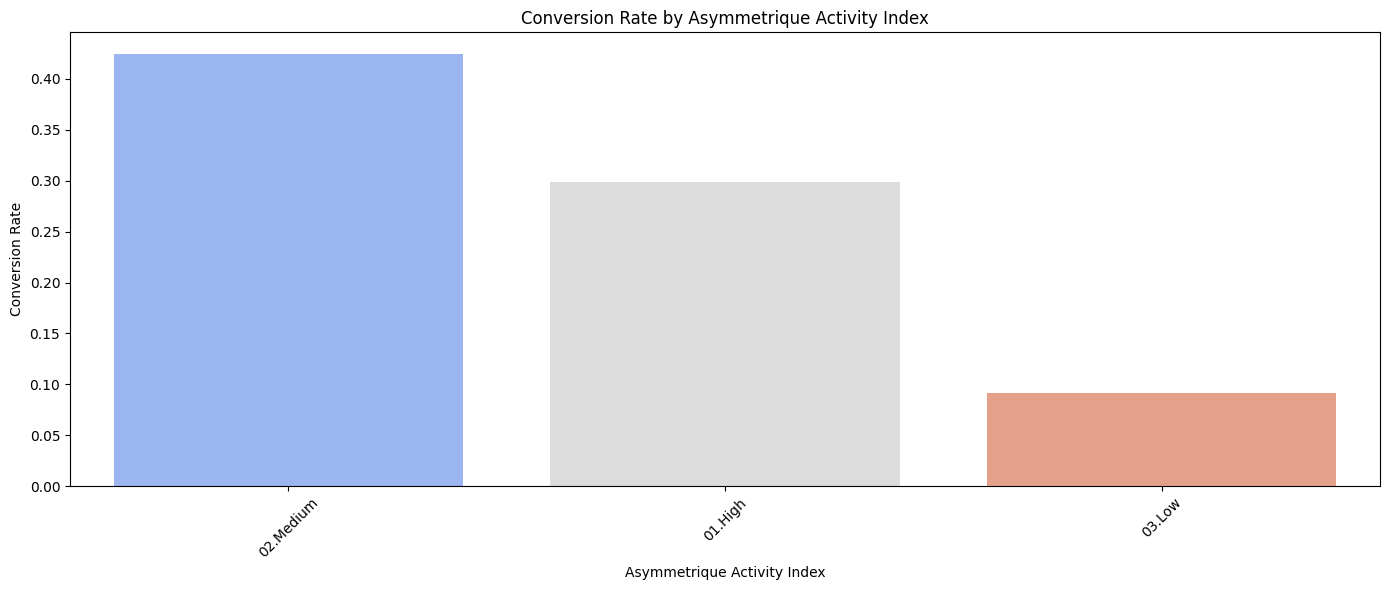

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


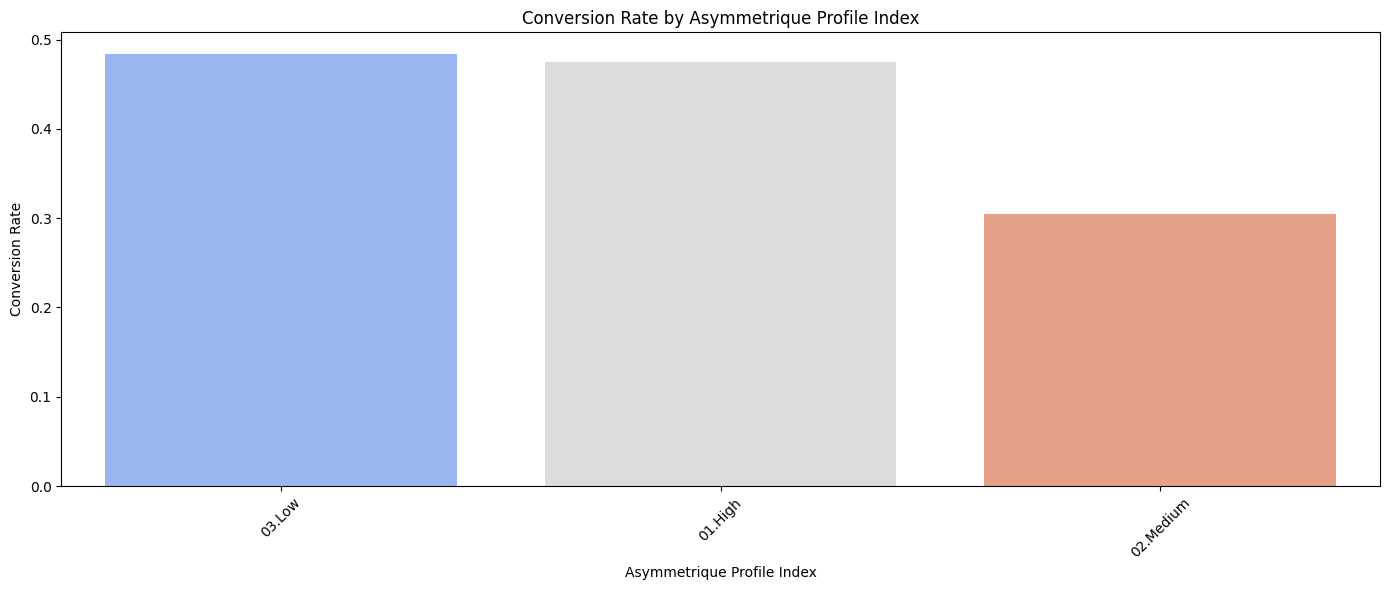

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


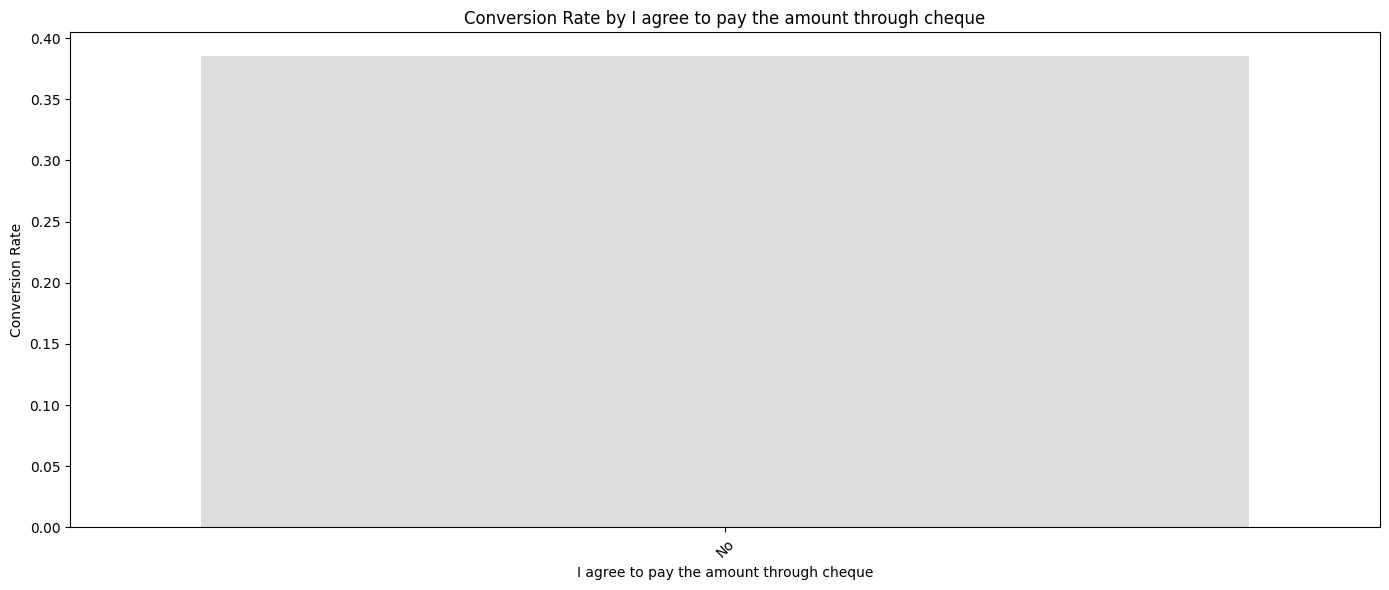

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


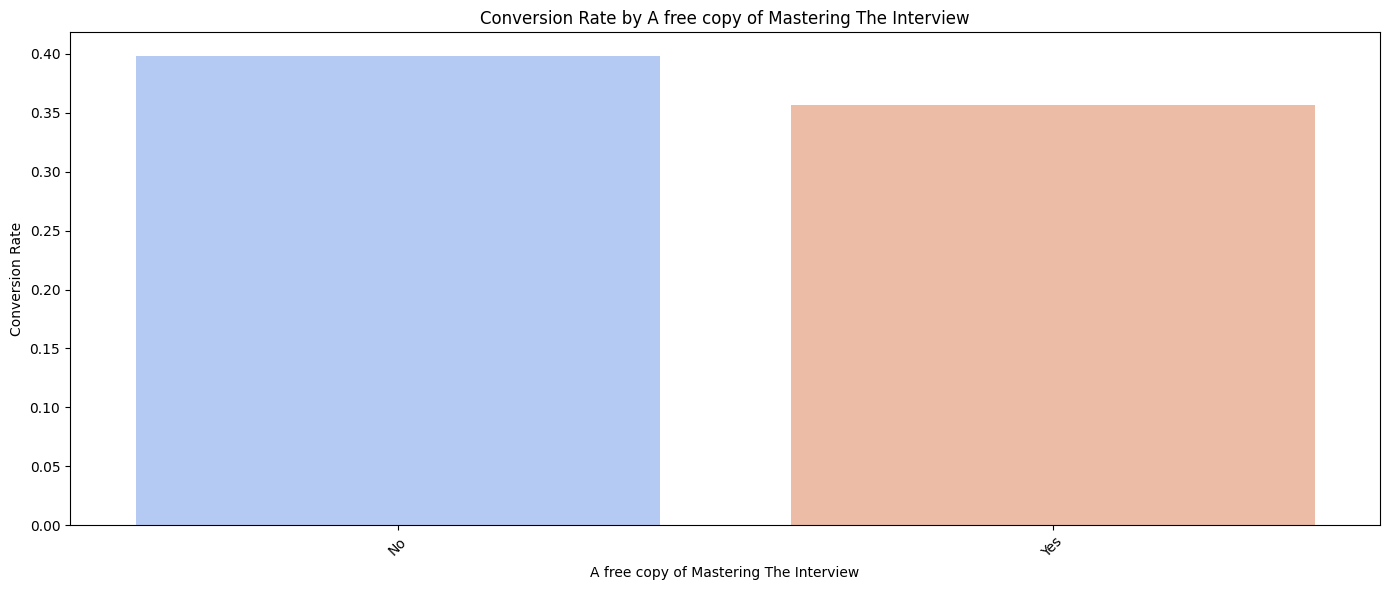

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\49712954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rate.index.astype(str), y=conv_rate.values, palette='coolwarm')


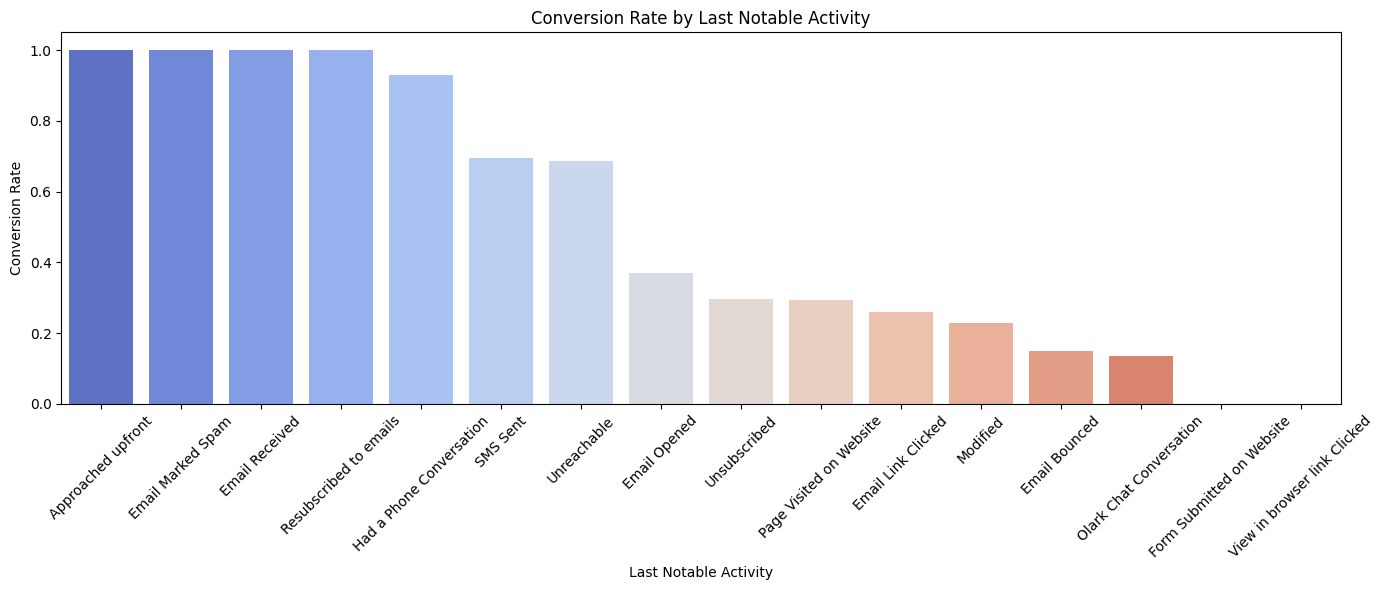

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\4040209556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='Set2')


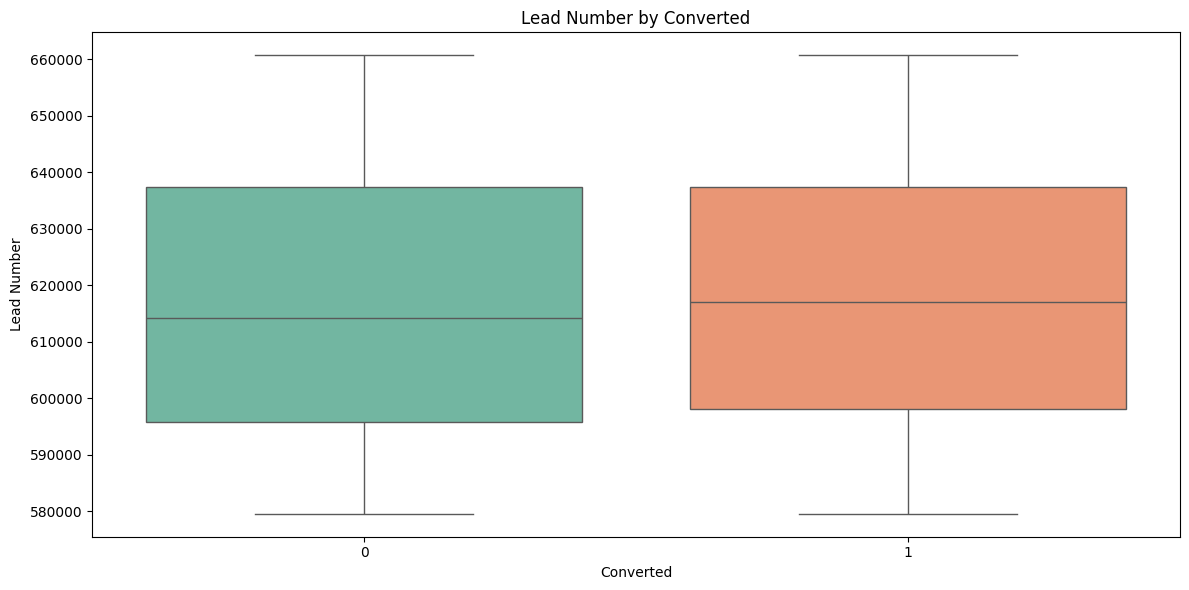

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\4040209556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='Set2')


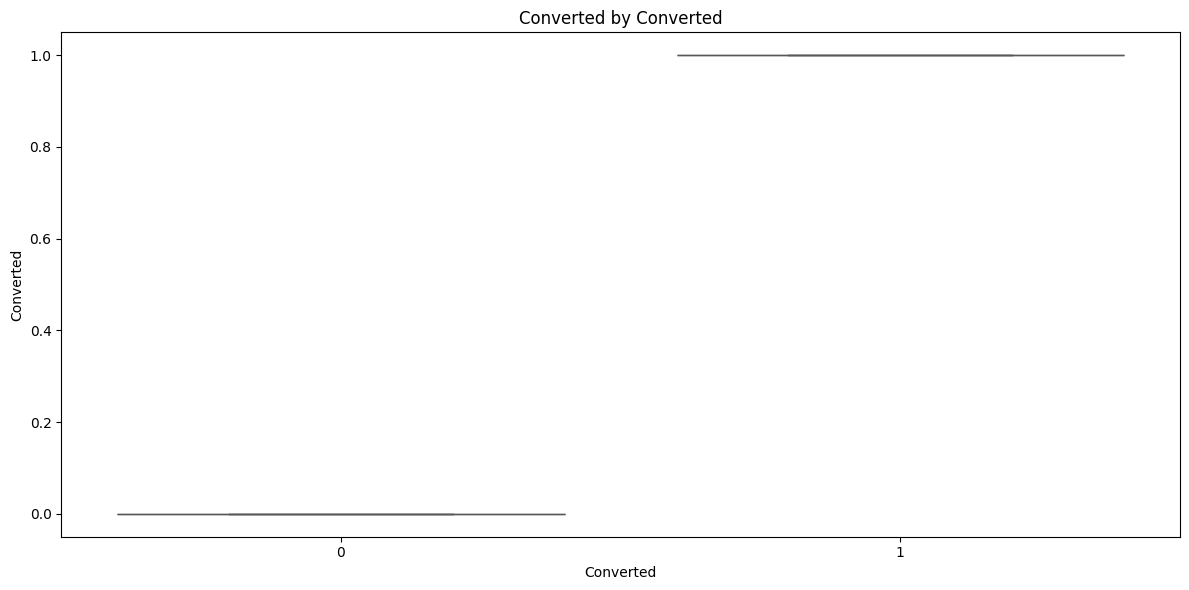

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\4040209556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='Set2')


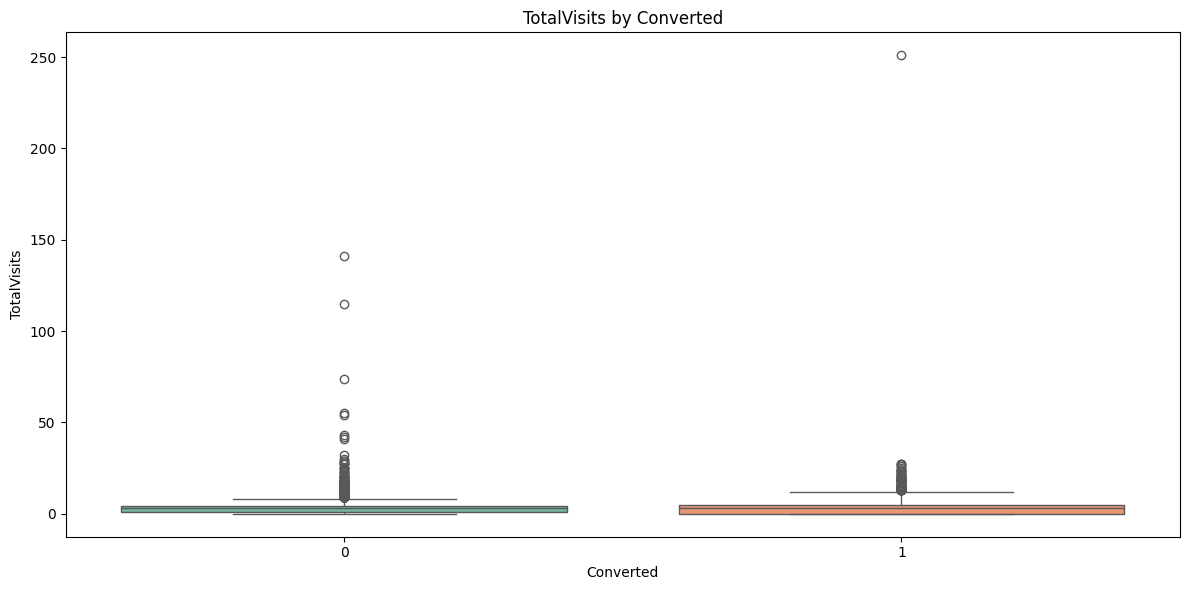

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\4040209556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='Set2')


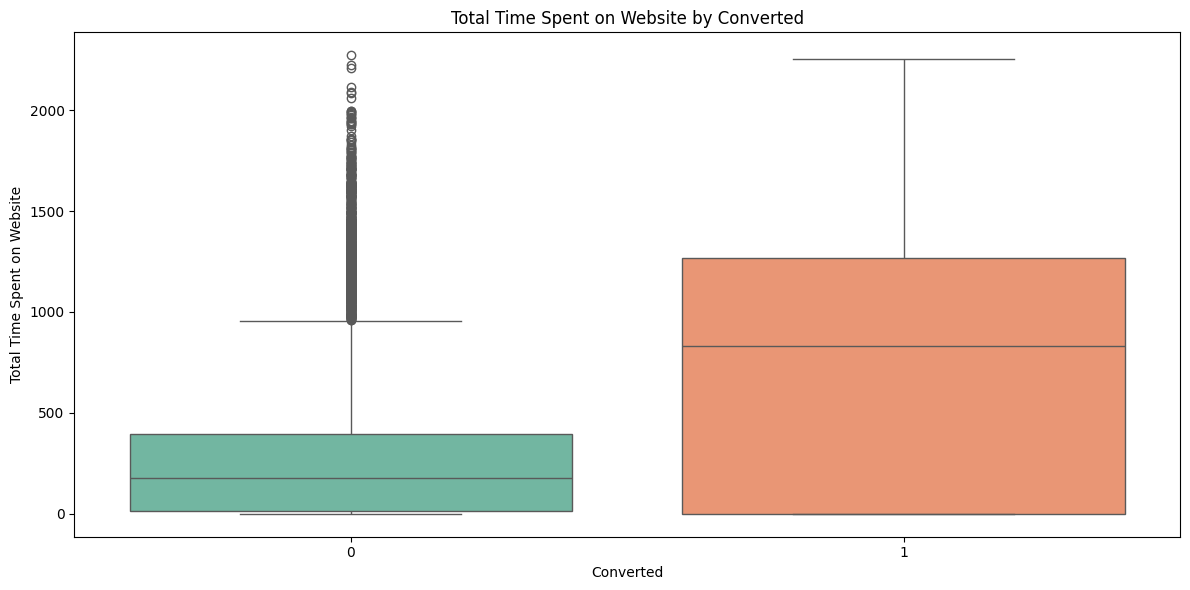

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\4040209556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='Set2')


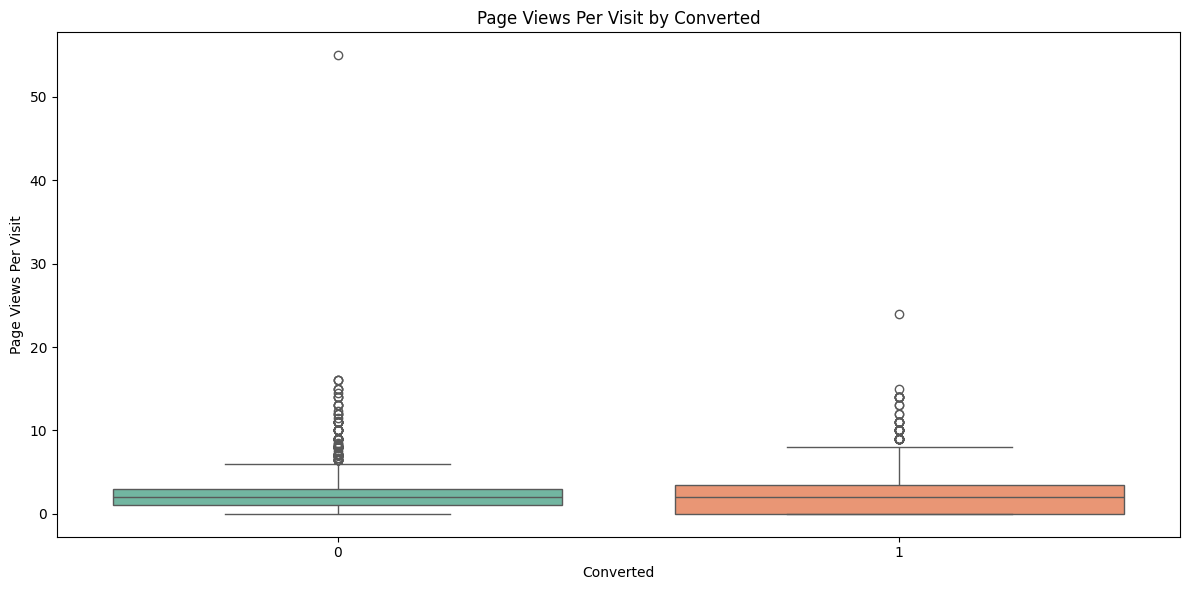

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\4040209556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='Set2')


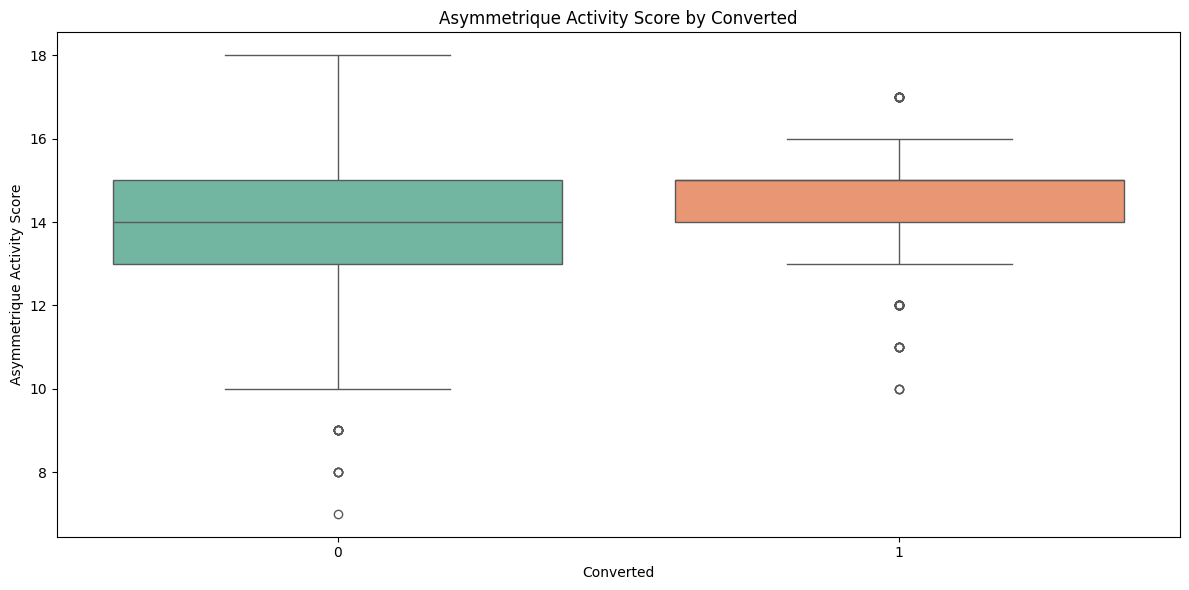

C:\Users\Minfy.DESKTOP-QMJ2NVP\AppData\Local\Temp\ipykernel_28788\4040209556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='Set2')


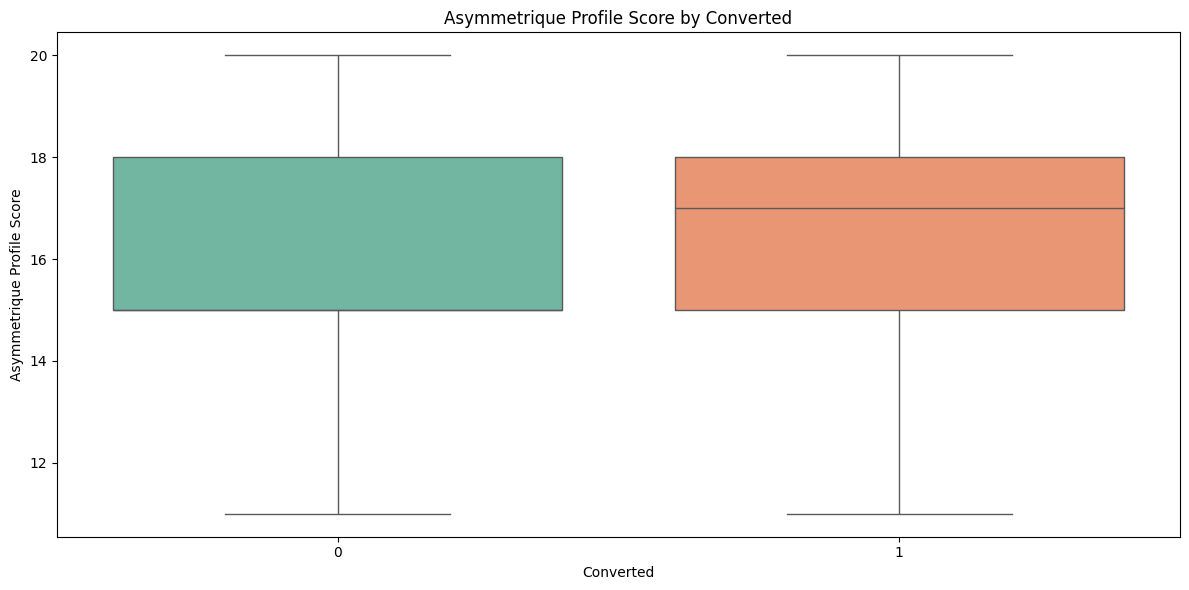

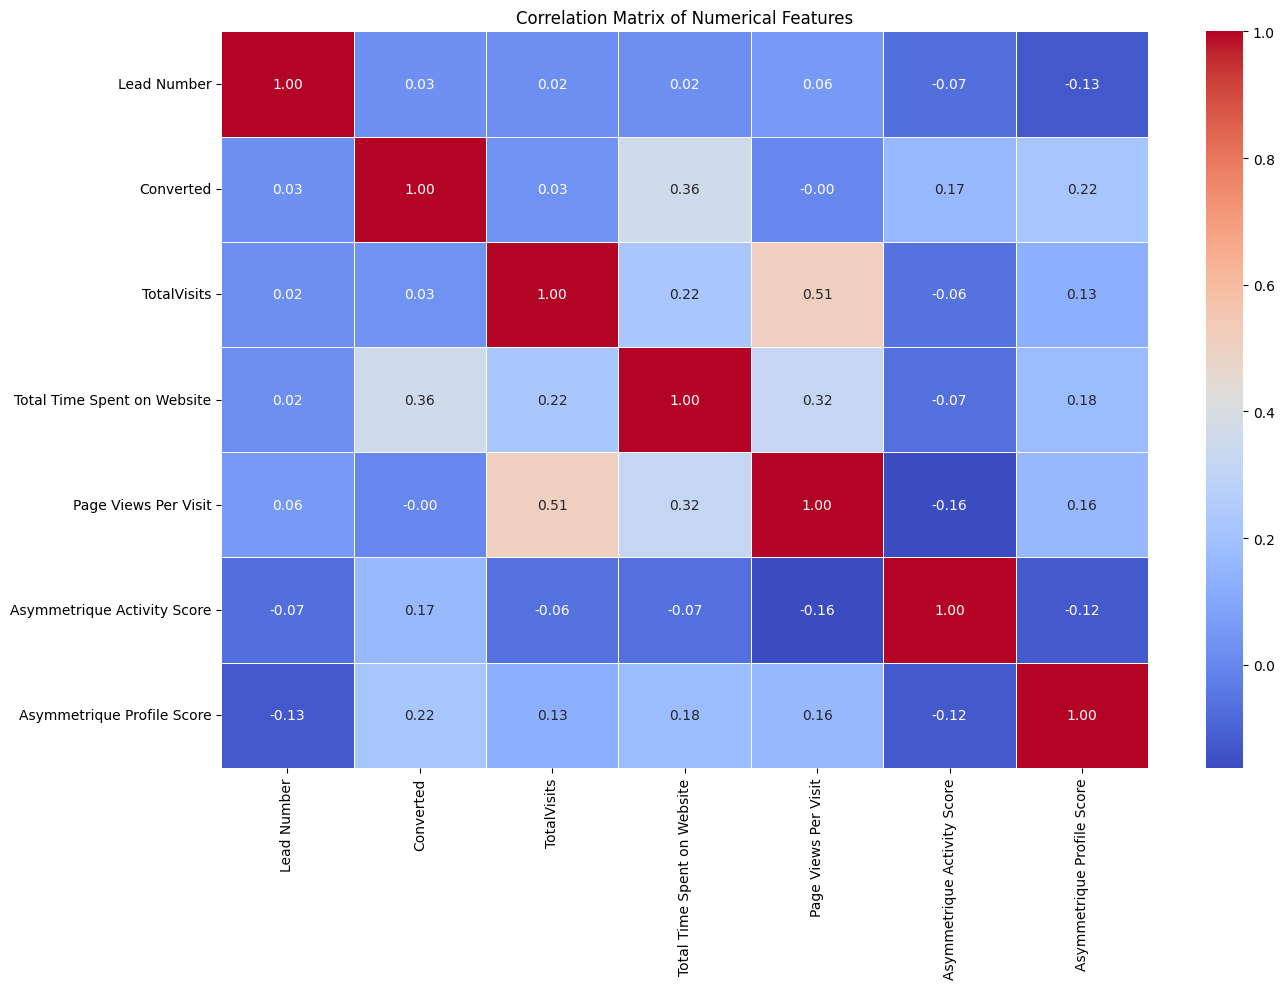

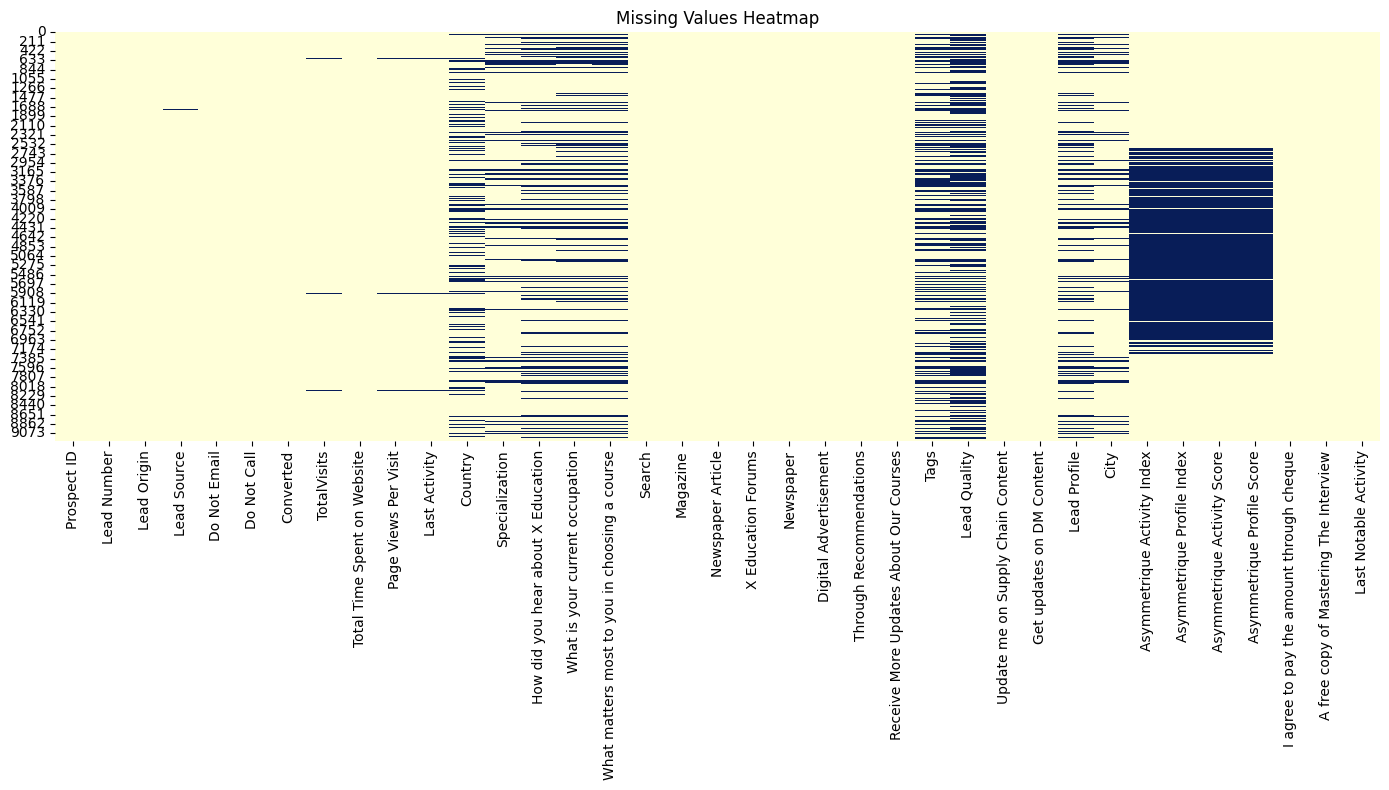

In [32]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['Prospect ID', 'Lead Number']]

plot_numerical_distribution(df, numerical_cols)
plot_categorical_distribution(df, categorical_cols)
plot_conversion_rate(df, categorical_cols)
plot_numerical_vs_target(df, numerical_cols)
plot_correlation_matrix(df, numerical_cols)
plot_missing_heatmap(df)


In [33]:
from scipy.stats import zscore

def detect_outliers(df, cols, threshold=3):
    outlier_report = {}
    for col in cols:
        zs = zscore(df[col].dropna())
        outliers = np.where(np.abs(zs) > threshold)[0]
        outlier_report[col] = len(outliers)
    return outlier_report

outlier_counts = detect_outliers(df, numerical_cols)
print(outlier_counts)

{'Lead Number': 0, 'Converted': 0, 'TotalVisits': 68, 'Total Time Spent on Website': 8, 'Page Views Per Visit': 120, 'Asymmetrique Activity Score': 71, 'Asymmetrique Profile Score': 0}


In [34]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


ARTIFACT_DIR = "artifacts"


# Custom Transformer: Drop ID Columns and High Missing Columns
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_ids=True, missing_thresh=0.4):
        self.drop_ids = drop_ids
        self.missing_thresh = missing_thresh
        self.cols_to_drop_ = []

    def fit(self, X, y=None):
        X_ = X.copy()
        if self.drop_ids:
            self.cols_to_drop_ += ['Prospect ID', 'Lead Number']
        # drop columns with > threshold missing values
        missing_ratio = X_.isnull().mean()
        self.cols_to_drop_ += missing_ratio[missing_ratio > self.missing_thresh].index.tolist()
        return self

    def transform(self, X):
        return X.drop(columns=self.cols_to_drop_, errors='ignore')


# Custom Transformer: Replace 'Select' with np.nan
class ReplaceSelectTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.replace("Select", np.nan)


# Custom Transformer: Encode Yes/No to 1/0
class BinaryMapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.binary_cols = []

    def fit(self, X, y=None):
        self.binary_cols = [col for col in X.columns if X[col].isin(['Yes', 'No']).all()]
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.binary_cols:
            X_copy[col] = X_copy[col].map({'Yes': 1, 'No': 0})
        return X_copy


def preprocess_data(df, training=True):
    """
    Preprocess the dataframe using sklearn Pipelines.
    """
    df = df.copy()

    # Step 1: Drop columns and replace 'Select'
    dropper = DropColumnsTransformer()
    selector = ReplaceSelectTransformer()
    mapper = BinaryMapper()

    df = dropper.fit_transform(df) if training else dropper.transform(df)
    df = selector.transform(df)
    df = mapper.fit_transform(df) if training else mapper.transform(df)

    # Step 2: Separate target
    y = df['Converted']
    X = df.drop('Converted', axis=1)

    # Step 3: Identify columns
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = X.select_dtypes(include='object').columns.tolist()

    # Step 4: Define transformers
    numeric_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ])

    categorical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols)
    ])

    # Step 5: Fit and transform
    X_processed = preprocessor.fit_transform(X) if training else preprocessor.transform(X)

    # Step 6: Save artifacts during training
    if training:
        os.makedirs(ARTIFACT_DIR, exist_ok=True)
        joblib.dump(preprocessor, f"{ARTIFACT_DIR}/preprocessor.pkl")
        joblib.dump(dropper, f"{ARTIFACT_DIR}/dropper.pkl")
        joblib.dump(mapper, f"{ARTIFACT_DIR}/mapper.pkl")

    # Step 7: Return final dataset
    X_processed = pd.DataFrame(X_processed)
    return pd.concat([X_processed, y.reset_index(drop=True)], axis=1)


df_cleaned = preprocess_data(df, training=True)


In [35]:
import pandas as pd

df = pd.read_csv('../data/raw/Lead Scoring.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/Lead Scoring.csv'

In [ ]:
df['Converted'].value_counts(normalize=True)


Converted
0    0.61461
1    0.38539
Name: proportion, dtype: float64

In [24]:
import mlflow
print(mlflow.get_tracking_uri())


file:///c:/Users/Minfy.DESKTOP-QMJ2NVP/Desktop/Final_Capstone/notebooks/mlruns


In [25]:
import pandas as pd

df = pd.read_csv('../data/raw/Lead Scoring.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


ARTIFACT_DIR = "artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)


# --- Custom Transformers ---

class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_ids=True, missing_thresh=0.4):
        self.drop_ids = drop_ids
        self.missing_thresh = missing_thresh
        self.cols_to_drop_ = []

    def fit(self, X, y=None):
        X_ = X.copy()
        if self.drop_ids:
            self.cols_to_drop_ += ['Prospect ID', 'Lead Number']
        missing_ratio = X_.isnull().mean()
        self.cols_to_drop_ += missing_ratio[missing_ratio > self.missing_thresh].index.tolist()
        return self

    def transform(self, X):
        return X.drop(columns=self.cols_to_drop_, errors='ignore')


class ReplaceSelectTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.replace("Select", np.nan)


class BinaryMapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.binary_cols = []

    def fit(self, X, y=None):
        self.binary_cols = [col for col in X.columns if X[col].dropna().isin(['Yes', 'No']).all()]
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.binary_cols:
            X_copy[col] = X_copy[col].map({'Yes': 1, 'No': 0})
        return X_copy


# --- Preprocessing Function ---

def preprocess_data(df, training=True):
    df = df.copy()

    # Ensure 'Converted' column exists
    if 'Converted' not in df.columns:
        df['Converted'] = np.nan

    # Apply transformations
    if training:
        dropper = DropColumnsTransformer()
        selector = ReplaceSelectTransformer()
        mapper = BinaryMapper()

        df = dropper.fit_transform(df)
        df = selector.transform(df)
        df = mapper.fit_transform(df)

        joblib.dump(dropper, f"{ARTIFACT_DIR}/dropper.pkl")
        joblib.dump(mapper, f"{ARTIFACT_DIR}/mapper.pkl")
    else:
        dropper = joblib.load(f"{ARTIFACT_DIR}/dropper.pkl")
        mapper = joblib.load(f"{ARTIFACT_DIR}/mapper.pkl")
        selector = ReplaceSelectTransformer()

        df = dropper.transform(df)
        df = selector.transform(df)
        df = mapper.transform(df)

    # Separate target
    y = df['Converted']
    X = df.drop('Converted', axis=1)

    if training:
        num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        print(num_cols)
        cat_cols = X.select_dtypes(include='object').columns.tolist()

        joblib.dump(num_cols, f"{ARTIFACT_DIR}/num_cols.pkl")
        joblib.dump(cat_cols, f"{ARTIFACT_DIR}/cat_cols.pkl")
    else:
        num_cols = joblib.load(f"{ARTIFACT_DIR}/num_cols.pkl")
        cat_cols = joblib.load(f"{ARTIFACT_DIR}/cat_cols.pkl")

        for col in num_cols + cat_cols:
            if col not in X.columns:
                X[col] = np.nan

        X = X[num_cols + cat_cols]

    # Define pipelines
    numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler())
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols)
    ])

    if training:
        X_processed = preprocessor.fit_transform(X)
        joblib.dump(preprocessor, f"{ARTIFACT_DIR}/preprocessor.pkl")

        # Optional: save feature names
        cat_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_cols)
        all_feature_names = num_cols + list(cat_feature_names)
        joblib.dump(all_feature_names, f"{ARTIFACT_DIR}/feature_names.pkl")
    else:
        preprocessor = joblib.load(f"{ARTIFACT_DIR}/preprocessor.pkl")
        X_processed = preprocessor.transform(X)

    return df


In [29]:
df = preprocess_data(df,True)
df.info()

['Do Not Email', 'Do Not Call', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Conver